# Project 2-Time Series Forecasting using NN, LSTM and CNN

# Neural Networks

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('CSC215_P2_Stock_Price.csv')

In [2]:
data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2000/3/27,3.812500,4.156250,3.812500,4.125000,4.125000,3675600
1,2000/3/28,4.125000,4.125000,4.000000,4.015625,4.015625,1077600
2,2000/3/29,4.000000,4.031250,3.953125,4.000000,4.000000,437200
3,2000/3/30,4.000000,4.000000,3.843750,3.843750,3.843750,1883600
4,2000/3/31,3.734375,3.734375,3.390625,3.390625,3.390625,7931600


In [3]:
#Checking for missing values in the data
data=pd.read_csv('CSC215_P2_Stock_Price.csv', na_values=[' ','?'])
data[data.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj_Close,Volume


In [4]:
#Removing Date and Adj_Close columns from the data
print("Before drop: {}".format(data.columns))
data = data.drop(['Date','Adj_Close'],axis = 1)
print("After drop: {}".format(data.columns))


Before drop: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')
After drop: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [5]:
data.head()

,Open,High,Low,Close,Volume
0,3.812500,4.156250,3.812500,4.125000,3675600
1,4.125000,4.125000,4.000000,4.015625,1077600
2,4.000000,4.031250,3.953125,4.000000,437200
3,4.000000,4.000000,3.843750,3.843750,1883600
4,3.734375,3.734375,3.390625,3.390625,7931600


In [6]:
data['Close_y']= data['Close']
data.head()

,Open,High,Low,Close,Volume,Close_y
0,3.812500,4.156250,3.812500,4.125000,3675600,4.125000
1,4.125000,4.125000,4.000000,4.015625,1077600,4.015625
2,4.000000,4.031250,3.953125,4.000000,437200,4.000000
3,4.000000,4.000000,3.843750,3.843750,1883600,3.843750
4,3.734375,3.734375,3.390625,3.390625,7931600,3.390625


In [7]:
#Normalizing the training numeric values using zscore
from scipy.stats import zscore
data['Open'] = zscore(data['Open'])
data['High'] = zscore(data['High'])
data['Low'] = zscore(data['Low'])
data['Volume'] = zscore(data['Volume'])
data['Close'] = zscore(data['Close'])

In [8]:
x=data.as_matrix(columns=['Open','High','Low','Volume','Close'])

C:\Users\veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [12]:
x.shape

(4392, 5)

In [13]:
x

array([[-0.89431058, -0.88512247, -0.89240801,  1.10493783, -0.88446424],
       [-0.88386304, -0.88615698, -0.8860762 , -0.49735731, -0.88812198],
       [-0.88804206, -0.88926051, -0.88765915, -0.89231874, -0.88864451],
       ...,
       [ 2.7236301 ,  2.70119294,  2.70194906,  0.15583391,  2.73080072],
       [ 2.73800591,  2.71476585,  2.76104594, -0.39004424,  2.73447912],
       [ 2.73265691,  2.77733298,  2.76138371, -0.16795552,  2.76290516]])

In [15]:
y=data['Close_y'].tolist()

In [16]:
y=np.array(y)

In [17]:
y.shape

(4392,)

In [18]:
y

array([  4.125   ,   4.015625,   4.      , ..., 112.230003, 112.339996,
       113.190002])

In [19]:
#Splitting the dataset into 70% training and 30% testing data sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.30,random_state=0)

In [20]:
print(X_train.shape)
print(X_test.shape)

(3074, 5)
(1318, 5)


In [21]:
print(Y_train.shape)
print(Y_test.shape)

(3074,)
(1318,)


In [22]:
type(Y_test)

numpy.ndarray

In [24]:
import numpy as np

def to_sequences(seq_size, data1,data2):
    x = []
    y = []

    for i in range(len(data1)-SEQUENCE_SIZE-1):
        print(i)
        window = data1[i:(i+SEQUENCE_SIZE)]
        after_window = data2[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [25]:
SEQUENCE_SIZE = 7
X_train,Y_train = to_sequences(SEQUENCE_SIZE,X_train,Y_train)
X_test,Y_test = to_sequences(SEQUENCE_SIZE,X_test,Y_test)

print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

0
[[array([0.05892285, 0.09108264, 0.06369519, 1.38136149, 0.08886987])], [array([-0.66530054, -0.66667532, -0.66302767, -0.21982351, -0.66282632])], [array([ 0.63194939,  0.62604851,  0.63473996, -0.27705714,  0.63799022])], [array([-0.73458861, -0.73304948, -0.73115793, -0.06736494, -0.73104833])], [array([-0.50290401, -0.503471  , -0.50844709,  0.79780042, -0.50188591])], [array([0.15420433, 0.1839403 , 0.16078293, 0.6645842 , 0.18635377])], [array([-0.05725381, -0.0623559 , -0.05736897, -0.42433508, -0.05861006])]] - 6.7525
1
[[array([-0.66530054, -0.66667532, -0.66302767, -0.21982351, -0.66282632])], [array([ 0.63194939,  0.62604851,  0.63473996, -0.27705714,  0.63799022])], [array([-0.73458861, -0.73304948, -0.73115793, -0.06736494, -0.73104833])], [array([-0.50290401, -0.503471  , -0.50844709,  0.79780042, -0.50188591])], [array([0.15420433, 0.1839403 , 0.16078293, 0.6645842 , 0.18635377])], [array([-0.05725381, -0.0623559 , -0.05736897, -0.42433508, -0.05861006])], [array([-0.7

[[array([1.11186751, 1.1181442 , 1.13284229, 0.17513793, 1.1137049 ])], [array([-0.7426959 , -0.74554637, -0.74044459, -0.29235234, -0.74325471])], [array([ 2.07772149,  2.09273558,  2.10827855, -0.34156833,  2.11145176])], [array([ 2.99008415,  2.96470332,  2.97413236, -0.64833569,  2.96288915])], [array([-0.86463957, -0.86074941, -0.86319726,  0.91547475, -0.86272684])], [array([ 0.11525587,  0.11706954,  0.12735091, -0.05391997,  0.11946944])], [array([-0.00225794, -0.00376121, -0.00266217, -0.69829178, -0.00326329])]] - 40.355
120
[[array([-0.7426959 , -0.74554637, -0.74044459, -0.29235234, -0.74325471])], [array([ 2.07772149,  2.09273558,  2.10827855, -0.34156833,  2.11145176])], [array([ 2.99008415,  2.96470332,  2.97413236, -0.64833569,  2.96288915])], [array([-0.86463957, -0.86074941, -0.86319726,  0.91547475, -0.86272684])], [array([ 0.11525587,  0.11706954,  0.12735091, -0.05391997,  0.11946944])], [array([-0.00225794, -0.00376121, -0.00266217, -0.69829178, -0.00326329])], [a

[[array([-0.82535683, -0.82770716, -0.82961757, -0.24893372, -0.83064326])], [array([1.56203117, 1.53575544, 1.48793026, 1.66703628, 1.4752146 ])], [array([-0.22148912, -0.22878788, -0.21574866, -0.23215834, -0.22138982])], [array([ 2.81222526,  2.7968644 ,  2.78333405, -0.10899501,  2.75621659])], [array([-0.60704507, -0.61205318, -0.6071389 , -0.41150685, -0.61224505])], [array([ 0.21371361,  0.21803772,  0.19759185, -0.01111809,  0.2239762 ])], [array([-0.18170486, -0.18856613, -0.18383634,  0.21312922, -0.18811483])]] - 22.897499
222
[[array([1.56203117, 1.53575544, 1.48793026, 1.66703628, 1.4752146 ])], [array([-0.22148912, -0.22878788, -0.21574866, -0.23215834, -0.22138982])], [array([ 2.81222526,  2.7968644 ,  2.78333405, -0.10899501,  2.75621659])], [array([-0.60704507, -0.61205318, -0.6071389 , -0.41150685, -0.61224505])], [array([ 0.21371361,  0.21803772,  0.19759185, -0.01111809,  0.2239762 ])], [array([-0.18170486, -0.18856613, -0.18383634,  0.21312922, -0.18811483])], [arr

[[array([-0.17953184, -0.18227627, -0.18358307, -0.16604362, -0.18936892])], [array([-0.66856017, -0.67255133, -0.66995044, -0.18972651, -0.6734442 ])], [array([ 0.37084448,  0.36452432,  0.37522014, -0.13458979,  0.3781446 ])], [array([1.08445317, 1.10308167, 1.10633312, 0.84343931, 1.10233457])], [array([ 1.65146193,  1.63258542,  1.63212656, -0.69008911,  1.62286174])], [array([1.66450043, 1.65824134, 1.66690923, 0.06942839, 1.6499501 ])], [array([1.45839139, 1.46524307, 1.46665521, 0.21016886, 1.47789001])]] - 11.97
320
[[array([-0.66856017, -0.67255133, -0.66995044, -0.18972651, -0.6734442 ])], [array([ 0.37084448,  0.36452432,  0.37522014, -0.13458979,  0.3781446 ])], [array([1.08445317, 1.10308167, 1.10633312, 0.84343931, 1.10233457])], [array([ 1.65146193,  1.63258542,  1.63212656, -0.69008911,  1.62286174])], [array([1.66450043, 1.65824134, 1.66690923, 0.06942839, 1.6499501 ])], [array([1.45839139, 1.46524307, 1.46665521, 0.21016886, 1.47789001])], [array([-0.62250742, -0.6220

[[array([1.90721774, 1.90039953, 1.90802453, 0.04771907, 1.88705489])], [array([0.50774906, 0.49181048, 0.51333804, 0.03612433, 0.50071002])], [array([-0.7753758 , -0.77509197, -0.77353884,  0.3497992 , -0.77310184])], [array([-0.65986782, -0.66237175, -0.65804664, -0.42852892, -0.65998373])], [array([-0.67382573, -0.67759974, -0.67661995,  0.05154287, -0.67795889])], [array([-0.48819387, -0.48907059, -0.48523046, -0.25929498, -0.48692051])], [array([-0.59083049, -0.59500446, -0.58780577, -0.87504997, -0.59284859])]] - 85.040001
425
[[array([0.50774906, 0.49181048, 0.51333804, 0.03612433, 0.50071002])], [array([-0.7753758 , -0.77509197, -0.77353884,  0.3497992 , -0.77310184])], [array([-0.65986782, -0.66237175, -0.65804664, -0.42852892, -0.65998373])], [array([-0.67382573, -0.67759974, -0.67661995,  0.05154287, -0.67795889])], [array([-0.48819387, -0.48907059, -0.48523046, -0.25929498, -0.48692051])], [array([-0.59083049, -0.59500446, -0.58780577, -0.87504997, -0.59284859])], [array([1

[[array([-0.8305806 , -0.82460363, -0.82856227, -0.82842429, -0.82228272])], [array([1.40540148, 1.42104883, 1.40553225, 0.49127976, 1.44361176])], [array([-0.79543508, -0.79578218, -0.79278754, -0.57753374, -0.79325075])], [array([-7.47627143e-01, -7.50843058e-01, -7.47873910e-01, -2.63435239e-04,
       -7.48939882e-01])], [array([-0.09185603, -0.09579126, -0.09620413, -0.67510229, -0.10208487])], [array([-0.76935802, -0.77269191, -0.76830455,  0.15244183, -0.77009205])], [array([ 0.12144088,  0.1109452 ,  0.1033745 , -0.17763837,  0.09271575])]] - 4.9875
578
[[array([1.40540148, 1.42104883, 1.40553225, 0.49127976, 1.44361176])], [array([-0.79543508, -0.79578218, -0.79278754, -0.57753374, -0.79325075])], [array([-7.47627143e-01, -7.50843058e-01, -7.47873910e-01, -2.63435239e-04,
       -7.48939882e-01])], [array([-0.09185603, -0.09579126, -0.09620413, -0.67510229, -0.10208487])], [array([-0.76935802, -0.77269191, -0.76830455,  0.15244183, -0.77009205])], [array([ 0.12144088,  0.11094

[[array([ 0.3823786 ,  0.37644188,  0.39413121, -0.31196473,  0.38232487])], [array([0.10572772, 0.09952431, 0.09915329, 0.48165859, 0.08803388])], [array([0.13865839, 0.143553  , 0.1305591 , 0.35090933, 0.13702651])], [array([-0.79526792, -0.79520285, -0.79464487, -0.4830489 , -0.79333435])], [array([-0.6323699 , -0.63704695, -0.63280383, -0.37400895, -0.6363234 ])], [array([-0.74010492, -0.74173937, -0.73934707,  0.11198357, -0.74292029])], [array([-0.79610372, -0.79718911, -0.79354736,  0.47635461, -0.79550809])]] - 4.7875
715
[[array([0.10572772, 0.09952431, 0.09915329, 0.48165859, 0.08803388])], [array([0.13865839, 0.143553  , 0.1305591 , 0.35090933, 0.13702651])], [array([-0.79526792, -0.79520285, -0.79464487, -0.4830489 , -0.79333435])], [array([-0.6323699 , -0.63704695, -0.63280383, -0.37400895, -0.6363234 ])], [array([-0.74010492, -0.74173937, -0.73934707,  0.11198357, -0.74292029])], [array([-0.79610372, -0.79718911, -0.79354736,  0.47635461, -0.79550809])], [array([-0.862132

[[array([-0.78899939, -0.79139585, -0.79008597,  0.53901557, -0.79149503])], [array([-0.72389034, -0.72560101, -0.72246225, -0.58468794, -0.72226976])], [array([ 1.20397291,  1.19527734,  1.20916163, -0.12484527,  1.20416602])], [array([-0.8169988 , -0.81994833, -0.82117516, -0.63205371, -0.82228272])], [array([1.55333875, 1.56753556, 1.57606908, 0.06116405, 1.58707866])], [array([0.51527122, 0.50919031, 0.50506451, 0.01367493, 0.49234948])], [array([-0.73091108, -0.72485616, -0.72794982,  0.81926303, -0.72544676])]] - 98.650002
867
[[array([-0.72389034, -0.72560101, -0.72246225, -0.58468794, -0.72226976])], [array([ 1.20397291,  1.19527734,  1.20916163, -0.12484527,  1.20416602])], [array([-0.8169988 , -0.81994833, -0.82117516, -0.63205371, -0.82228272])], [array([1.55333875, 1.56753556, 1.57606908, 0.06116405, 1.58707866])], [array([0.51527122, 0.50919031, 0.50506451, 0.01367493, 0.49234948])], [array([-0.73091108, -0.72485616, -0.72794982,  0.81926303, -0.72544676])], [array([ 2.296

[[array([ 0.16657418,  0.16192589,  0.16567953, -0.18861637,  0.15659028])], [array([-0.81950621, -0.81829312, -0.81684842, -0.52128689, -0.81858318])], [array([-0.65343214, -0.65608193, -0.65272792, -0.4980974 , -0.65438217])], [array([ 0.41798377,  0.41550501,  0.43009582, -0.35044941,  0.42095053])], [array([-0.790671  , -0.79329935, -0.79743087, -0.4149606 , -0.79333435])], [array([ 0.41764949,  0.40722893,  0.42503047, -0.58135754,  0.41593414])], [array([-0.56801306, -0.55710001, -0.56484241, -0.12163822, -0.5543065 ])]] - 77.964996
1009
[[array([-0.81950621, -0.81829312, -0.81684842, -0.52128689, -0.81858318])], [array([-0.65343214, -0.65608193, -0.65272792, -0.4980974 , -0.65438217])], [array([ 0.41798377,  0.41550501,  0.43009582, -0.35044941,  0.42095053])], [array([-0.790671  , -0.79329935, -0.79743087, -0.4149606 , -0.79333435])], [array([ 0.41764949,  0.40722893,  0.42503047, -0.58135754,  0.41593414])], [array([-0.56801306, -0.55710001, -0.56484241, -0.12163822, -0.554306

[[array([0.4117989 , 0.43702285, 0.42587461, 0.6941878 , 0.44670099])], [array([-0.66220807, -0.66518562, -0.66133918, -0.37918958, -0.66290992])], [array([-0.77353704, -0.77550578, -0.77210363,  0.18155204, -0.77368708])], [array([-0.86296797, -0.86116321, -0.86285957, -0.2282112 , -0.86356289])], [array([-0.83789387, -0.84063853, -0.84470838, -0.88615132, -0.84725984])], [array([0.71669982, 0.71460257, 0.69822694, 0.22521736, 0.69099602])], [array([-0.46428994, -0.47036671, -0.46564403, -0.45763914, -0.4696142 ])]] - 109.980003
1133
[[array([-0.66220807, -0.66518562, -0.66133918, -0.37918958, -0.66290992])], [array([-0.77353704, -0.77550578, -0.77210363,  0.18155204, -0.77368708])], [array([-0.86296797, -0.86116321, -0.86285957, -0.2282112 , -0.86356289])], [array([-0.83789387, -0.84063853, -0.84470838, -0.88615132, -0.84725984])], [array([0.71669982, 0.71460257, 0.69822694, 0.22521736, 0.69099602])], [array([-0.46428994, -0.47036671, -0.46564403, -0.45763914, -0.4696142 ])], [array(

[[array([-0.6056242 , -0.61056349, -0.60536599,  0.01404497, -0.60982049])], [array([ 0.35546574,  0.35922763,  0.36998591, -0.2162464 ,  0.36493494])], [array([ 1.89618507,  1.88682662,  1.88674975, -0.02308288,  1.91614967])], [array([-0.82117781, -0.8227622 , -0.8185369 , -0.8279309 , -0.82075692])], [array([-0.50574574, -0.50777456, -0.51038885,  0.35769349, -0.506317  ])], [array([-0.66321103, -0.66410973, -0.66015725, -0.18405248, -0.66274271])], [array([ 0.19666316,  0.1943681 ,  0.202995  , -0.06798168,  0.20424532])]] - 35.014998999999996
1237
[[array([ 0.35546574,  0.35922763,  0.36998591, -0.2162464 ,  0.36493494])], [array([ 1.89618507,  1.88682662,  1.88674975, -0.02308288,  1.91614967])], [array([-0.82117781, -0.8227622 , -0.8185369 , -0.8279309 , -0.82075692])], [array([-0.50574574, -0.50777456, -0.51038885,  0.35769349, -0.506317  ])], [array([-0.66321103, -0.66410973, -0.66015725, -0.18405248, -0.66274271])], [array([ 0.19666316,  0.1943681 ,  0.202995  , -0.06798168, 

[[array([ 1.33552848,  1.33216379,  1.35555303, -0.59517255,  1.34746554])], [array([ 0.42717764,  0.42013958,  0.42942056, -0.12447523,  0.42897672])], [array([0.1650698 , 0.17136063, 0.17581043, 0.31168455, 0.17314411])], [array([-0.14033264, -0.13005424, -0.13368838, -0.47071406, -0.12281901])], [array([0.44924284, 0.43718828, 0.43752521, 0.05709355, 0.45021242])], [array([ 2.98406637,  3.00211137,  3.0160069 , -0.27613203,  3.01974099])], [array([-0.82483445, -0.81994833, -0.82539636, -0.46652022, -0.82019259])]] - 27.525
1308
[[array([ 0.42717764,  0.42013958,  0.42942056, -0.12447523,  0.42897672])], [array([0.1650698 , 0.17136063, 0.17581043, 0.31168455, 0.17314411])], [array([-0.14033264, -0.13005424, -0.13368838, -0.47071406, -0.12281901])], [array([0.44924284, 0.43718828, 0.43752521, 0.05709355, 0.45021242])], [array([ 2.98406637,  3.00211137,  3.0160069 , -0.27613203,  3.01974099])], [array([-0.82483445, -0.81994833, -0.82539636, -0.46652022, -0.82019259])], [array([-0.10322

[[array([-0.62167162, -0.62521215, -0.6239393 , -0.53756887, -0.62119083])], [array([0.35228962, 0.35939318, 0.35495842, 0.08386014, 0.37346273])], [array([-0.61749261, -0.62115687, -0.61397725, -0.75811573, -0.617763  ])], [array([ 1.23239041,  1.23516812,  1.24749025, -0.40188568,  1.23777529])], [array([ 1.88381535,  1.86729521,  1.87526794, -0.12546202,  1.87401248])], [array([-0.735508  , -0.73842894, -0.73504144, -0.58074079, -0.73664989])], [array([-0.45810493, -0.46324925, -0.46040977, -0.23610549, -0.46016682])]] - 13.78
1391
[[array([0.35228962, 0.35939318, 0.35495842, 0.08386014, 0.37346273])], [array([-0.61749261, -0.62115687, -0.61397725, -0.75811573, -0.617763  ])], [array([ 1.23239041,  1.23516812,  1.24749025, -0.40188568,  1.23777529])], [array([ 1.88381535,  1.86729521,  1.87526794, -0.12546202,  1.87401248])], [array([-0.735508  , -0.73842894, -0.73504144, -0.58074079, -0.73664989])], [array([-0.45810493, -0.46324925, -0.46040977, -0.23610549, -0.46016682])], [array(

[[array([0.19983924, 0.19966479, 0.2105931 , 0.30490039, 0.20441257])], [array([ 2.14625744,  2.16821337,  2.17581785, -0.12108315,  2.18970655])], [array([ 0.15654458,  0.15977415,  0.16719913, -0.12373514,  0.17080316])], [array([-0.75514937, -0.75787773, -0.75293936, -0.15913612, -0.75587913])], [array([ 2.78046484,  2.77931914,  2.79582865, -0.60571884,  2.76859029])], [array([-0.67073326, -0.67188925, -0.66775542, -0.52227367, -0.66909672])], [array([ 0.77537323,  0.76475559,  0.76694818, -0.34156833,  0.74985415])]] - 21.7125
1479
[[array([ 2.14625744,  2.16821337,  2.17581785, -0.12108315,  2.18970655])], [array([ 0.15654458,  0.15977415,  0.16719913, -0.12373514,  0.17080316])], [array([-0.75514937, -0.75787773, -0.75293936, -0.15913612, -0.75587913])], [array([ 2.78046484,  2.77931914,  2.79582865, -0.60571884,  2.76859029])], [array([-0.67073326, -0.67188925, -0.66775542, -0.52227367, -0.66909672])], [array([ 0.77537323,  0.76475559,  0.76694818, -0.34156833,  0.74985415])], 

[[array([-0.79167396, -0.79305107, -0.7919433 , -0.20773537, -0.79074258])], [array([0.04220678, 0.0422537 , 0.0479923 , 0.04340188, 0.05208352])], [array([1.09063814, 1.08801927, 1.07205696, 0.57268967, 1.10116409])], [array([-0.57269356, -0.56521057, -0.57269385,  0.78275192, -0.5665965 ])], [array([0.37753094, 0.39282848, 0.38079217, 0.10038882, 0.39352796])], [array([ 0.71452677,  0.71013352,  0.72878844, -0.35600009,  0.71641199])], [array([-0.79083816, -0.7940442 , -0.79337851,  0.20992216, -0.79626054])]] - 8.975
1585
[[array([0.04220678, 0.0422537 , 0.0479923 , 0.04340188, 0.05208352])], [array([1.09063814, 1.08801927, 1.07205696, 0.57268967, 1.10116409])], [array([-0.57269356, -0.56521057, -0.57269385,  0.78275192, -0.5665965 ])], [array([0.37753094, 0.39282848, 0.38079217, 0.10038882, 0.39352796])], [array([ 0.71452677,  0.71013352,  0.72878844, -0.35600009,  0.71641199])], [array([-0.79083816, -0.7940442 , -0.79337851,  0.20992216, -0.79626054])], [array([-0.72088144, -0.721

[[array([0.17743965, 0.23045184, 0.18543478, 2.06878187, 0.24019568])], [array([ 0.06059442,  0.05350917,  0.06589018, -0.16641367,  0.0594407 ])], [array([0.19649596, 0.20247862, 0.20367039, 0.13875016, 0.21277311])], [array([-0.82170019, -0.81581029, -0.82170281, -0.21735654, -0.81444472])], [array([ 0.46779767,  0.48353439,  0.47771103, -0.13483649,  0.49669699])], [array([-0.59484234, -0.59401133, -0.59016965, -0.57901392, -0.59092567])], [array([2.07070078, 2.06790734, 2.08193826, 0.05783364, 2.06898031])]] - 40.25
1731
[[array([ 0.06059442,  0.05350917,  0.06589018, -0.16641367,  0.0594407 ])], [array([0.19649596, 0.20247862, 0.20367039, 0.13875016, 0.21277311])], [array([-0.82170019, -0.81581029, -0.82170281, -0.21735654, -0.81444472])], [array([ 0.46779767,  0.48353439,  0.47771103, -0.13483649,  0.49669699])], [array([-0.59484234, -0.59401133, -0.59016965, -0.57901392, -0.59092567])], [array([2.07070078, 2.06790734, 2.08193826, 0.05783364, 2.06898031])], [array([0.31049947, 0.

[[array([0.3822114 , 0.39812517, 0.38923458, 0.00245023, 0.407072  ])], [array([-0.61356433, -0.60601164, -0.61515919,  0.43638974, -0.60405172])], [array([-0.63939065, -0.64184707, -0.63753158, -0.4754013 , -0.63807912])], [array([-0.48351338, -0.48741541, -0.48734106, -0.34687231, -0.48758939])], [array([-0.60788087, -0.61130834, -0.60426848, -0.50919875, -0.60706151])], [array([ 0.46913499,  0.45870615,  0.45947552, -0.3363877 ,  0.45322222])], [array([-0.62125372, -0.6240535 , -0.62140657, -0.02468641, -0.62428422])]] - 103.75
1879
[[array([-0.61356433, -0.60601164, -0.61515919,  0.43638974, -0.60405172])], [array([-0.63939065, -0.64184707, -0.63753158, -0.4754013 , -0.63807912])], [array([-0.48351338, -0.48741541, -0.48734106, -0.34687231, -0.48758939])], [array([-0.60788087, -0.61130834, -0.60426848, -0.50919875, -0.60706151])], [array([ 0.46913499,  0.45870615,  0.45947552, -0.3363877 ,  0.45322222])], [array([-0.62125372, -0.6240535 , -0.62140657, -0.02468641, -0.62428422])], [

[[array([ 0.71519544,  0.70549895,  0.71983948, -0.83545515,  0.71574312])], [array([-0.78440248, -0.78758886, -0.78856634, -0.68410672, -0.79157864])], [array([2.78949141, 2.75118054, 2.77691771, 0.1171642 , 2.74685282])], [array([ 2.53273271,  2.51216729,  2.49291486, -0.48076695,  2.47128948])], [array([-0.34861476, -0.35317737, -0.34576181, -0.61133119, -0.34872081])], [array([-0.16131133, -0.17068983, -0.16399667, -0.25263417, -0.16595937])], [array([ 0.10522627,  0.1025037 ,  0.10995958, -0.00581411,  0.10793187])]] - 11.4925
2021
[[array([-0.78440248, -0.78758886, -0.78856634, -0.68410672, -0.79157864])], [array([2.78949141, 2.75118054, 2.77691771, 0.1171642 , 2.74685282])], [array([ 2.53273271,  2.51216729,  2.49291486, -0.48076695,  2.47128948])], [array([-0.34861476, -0.35317737, -0.34576181, -0.61133119, -0.34872081])], [array([-0.16131133, -0.17068983, -0.16399667, -0.25263417, -0.16595937])], [array([ 0.10522627,  0.1025037 ,  0.10995958, -0.00581411,  0.10793187])], [arra

[[array([ 0.46829915,  0.45870615,  0.47703577, -0.48946301,  0.47412357])], [array([-0.86129636, -0.85983904, -0.85906048, -0.82990447, -0.8606367 ])], [array([ 0.35245685,  0.3534344 ,  0.36424514, -0.49476699,  0.35356457])], [array([ 2.90048606,  2.86671456,  2.90321613, -0.66523442,  2.88864752])], [array([1.51806783, 1.5693563 , 1.54398774, 0.25623947, 1.59309825])], [array([-0.57378011, -0.57414873, -0.57598639, -0.08019317, -0.58156186])], [array([1.31847803, 1.32769464, 1.33191438, 0.12296157, 1.34662942])]] - 42.695
2141
[[array([-0.86129636, -0.85983904, -0.85906048, -0.82990447, -0.8606367 ])], [array([ 0.35245685,  0.3534344 ,  0.36424514, -0.49476699,  0.35356457])], [array([ 2.90048606,  2.86671456,  2.90321613, -0.66523442,  2.88864752])], [array([1.51806783, 1.5693563 , 1.54398774, 0.25623947, 1.59309825])], [array([-0.57378011, -0.57414873, -0.57598639, -0.08019317, -0.58156186])], [array([1.31847803, 1.32769464, 1.33191438, 0.12296157, 1.34662942])], [array([ 0.37953

[[array([ 2.10613876,  2.1258399 ,  2.13090415, -0.40139229,  2.13653338])], [array([ 2.98941561,  2.94914449,  2.97852255, -0.51148069,  2.98094795])], [array([ 2.92188259,  2.91272953,  2.93732355, -0.49007975,  2.93178794])], [array([-0.72706639, -0.72758727, -0.72761212,  0.89055838, -0.73046309])], [array([-0.26419865, -0.27099589, -0.26707853, -0.42704874, -0.27431197])], [array([-0.82092707, -0.81994833, -0.82394005, -0.21340939, -0.81833237])], [array([ 1.13309697,  1.12277881,  1.13689462, -0.1942904 ,  1.13928812])]] - 85.889999
2268
[[array([ 2.98941561,  2.94914449,  2.97852255, -0.51148069,  2.98094795])], [array([ 2.92188259,  2.91272953,  2.93732355, -0.49007975,  2.93178794])], [array([-0.72706639, -0.72758727, -0.72761212,  0.89055838, -0.73046309])], [array([-0.26419865, -0.27099589, -0.26707853, -0.42704874, -0.27431197])], [array([-0.82092707, -0.81994833, -0.82394005, -0.21340939, -0.81833237])], [array([ 1.13309697,  1.12277881,  1.13689462, -0.1942904 ,  1.139288

[[array([-0.65226201, -0.65541985, -0.65306562, -0.13940038, -0.65413135])], [array([-0.81365558, -0.8166379 , -0.81355588, -0.85457414, -0.81540618])], [array([-0.72464256, -0.72775279, -0.72693673, -0.29679288, -0.73104833])], [array([-0.83371486, -0.83081069, -0.84069823, -0.02295953, -0.82907566])], [array([-0.8190883 , -0.82077594, -0.82149175, -0.65795686, -0.82092413])], [array([-0.78791285, -0.78974064, -0.78628689,  0.08509363, -0.78890326])], [array([-0.66939598, -0.67379275, -0.67079468,  0.3717552 , -0.67436386])]] - 6.9975
2400
[[array([-0.81365558, -0.8166379 , -0.81355588, -0.85457414, -0.81540618])], [array([-0.72464256, -0.72775279, -0.72693673, -0.29679288, -0.73104833])], [array([-0.83371486, -0.83081069, -0.84069823, -0.02295953, -0.82907566])], [array([-0.8190883 , -0.82077594, -0.82149175, -0.65795686, -0.82092413])], [array([-0.78791285, -0.78974064, -0.78628689,  0.08509363, -0.78890326])], [array([-0.66939598, -0.67379275, -0.67079468,  0.3717552 , -0.67436386]

[[array([-0.81031237, -0.81001704, -0.80925025, -0.63698764, -0.80855053])], [array([1.45220652, 1.53856928, 1.46091444, 1.29378416, 1.56182993])], [array([-0.65468584, -0.65575089, -0.65188368, -0.70310236, -0.65337891])], [array([-0.74169294, -0.74422219, -0.74171095,  2.00044688, -0.74233505])], [array([ 2.0148692 ,  1.99607099,  2.02284137, -0.33811458,  2.01480394])], [array([0.00961043, 0.00335622, 0.00240324, 0.99713136, 0.00493001])], [array([-0.78607408, -0.78932683, -0.78729998,  0.22768432, -0.79049177])]] - 62.794998
2539
[[array([1.45220652, 1.53856928, 1.46091444, 1.29378416, 1.56182993])], [array([-0.65468584, -0.65575089, -0.65188368, -0.70310236, -0.65337891])], [array([-0.74169294, -0.74422219, -0.74171095,  2.00044688, -0.74233505])], [array([ 2.0148692 ,  1.99607099,  2.02284137, -0.33811458,  2.01480394])], [array([0.00961043, 0.00335622, 0.00240324, 0.99713136, 0.00493001])], [array([-0.78607408, -0.78932683, -0.78729998,  0.22768432, -0.79049177])], [array([ 1.10

[[array([0.26971238, 0.29119824, 0.27070318, 0.70676934, 0.30373572])], [array([-0.72714997, -0.7308977 , -0.73732089,  2.26737272, -0.73731873])], [array([1.97909683, 1.98415343, 1.99244865, 0.20973714, 2.00343371])], [array([ 1.10066778,  1.10953728,  1.09637114, -0.13644002,  1.10149845])], [array([-0.48518501, -0.49138796, -0.48759434, -0.21414948, -0.49268932])], [array([-0.65025609, -0.65326807, -0.65399428, -0.5725998 , -0.65722475])], [array([ 2.98306344,  2.96139292,  2.99743349, -0.73486456,  2.98128244])]] - 15.9075
2690
[[array([-0.72714997, -0.7308977 , -0.73732089,  2.26737272, -0.73731873])], [array([1.97909683, 1.98415343, 1.99244865, 0.20973714, 2.00343371])], [array([ 1.10066778,  1.10953728,  1.09637114, -0.13644002,  1.10149845])], [array([-0.48518501, -0.49138796, -0.48759434, -0.21414948, -0.49268932])], [array([-0.65025609, -0.65326807, -0.65399428, -0.5725998 , -0.65722475])], [array([ 2.98306344,  2.96139292,  2.99743349, -0.73486456,  2.98128244])], [array([-0

[[array([ 0.29879829,  0.28639808,  0.29586153, -0.20983229,  0.28634576])], [array([-0.72029638, -0.72278714, -0.71849431,  0.10384258, -0.72043044])], [array([ 2.85200958,  2.82467217,  2.86606959, -0.36192081,  2.83246469])], [array([-0.42475642, -0.42484827, -0.41811328, -0.27903072, -0.41953459])], [array([ 1.55785216,  1.53707938,  1.54584507, -0.21661645,  1.52186655])], [array([-0.90893713, -0.91046797, -0.91984585, 10.60128098, -0.91372613])], [array([-0.43520396, -0.44123484, -0.4369399 , -0.57333989, -0.43792775])]] - 15.9525
2788
[[array([-0.72029638, -0.72278714, -0.71849431,  0.10384258, -0.72043044])], [array([ 2.85200958,  2.82467217,  2.86606959, -0.36192081,  2.83246469])], [array([-0.42475642, -0.42484827, -0.41811328, -0.27903072, -0.41953459])], [array([ 1.55785216,  1.53707938,  1.54584507, -0.21661645,  1.52186655])], [array([-0.90893713, -0.91046797, -0.91984585, 10.60128098, -0.91372613])], [array([-0.43520396, -0.44123484, -0.4369399 , -0.57333989, -0.43792775

[[array([0.54168263, 0.54610153, 0.5525108 , 0.5745399 , 0.54619139])], [array([ 0.08767447,  0.09422762,  0.09830915, -0.04528558,  0.10207952])], [array([-0.60294963, -0.60584612, -0.60038497, -0.55878479, -0.60396811])], [array([-0.60980322, -0.60899103, -0.60604138, -0.29013207, -0.60589104])], [array([-0.80914225, -0.80712041, -0.80747734, -0.35994724, -0.80462108])], [array([1.29256806, 1.292935  , 1.27906481, 0.13011578, 1.31318726])], [array([-0.52864674, -0.5153058 , -0.53352106,  0.77214396, -0.5356625 ])]] - 33.18
2906
[[array([ 0.08767447,  0.09422762,  0.09830915, -0.04528558,  0.10207952])], [array([-0.60294963, -0.60584612, -0.60038497, -0.55878479, -0.60396811])], [array([-0.60980322, -0.60899103, -0.60604138, -0.29013207, -0.60589104])], [array([-0.80914225, -0.80712041, -0.80747734, -0.35994724, -0.80462108])], [array([1.29256806, 1.292935  , 1.27906481, 0.13011578, 1.31318726])], [array([-0.52864674, -0.5153058 , -0.53352106,  0.77214396, -0.5356625 ])], [array([0.09

[[array([-0.53282576, -0.53856159, -0.54002172,  0.10285579, -0.54143127])], [array([-0.52722588, -0.52631299, -0.5224615 , -0.25559453, -0.52412495])], [array([-0.04003627, -0.04712794, -0.04774462, -0.53090806, -0.05509867])], [array([-0.80571546, -0.80794802, -0.80494462, -0.55483764, -0.80754727])], [array([ 0.09636679,  0.11061423,  0.10033523, -0.05293318,  0.12147604])], [array([ 2.82426086,  2.81540299,  2.86100407, -0.36358601,  2.84483836])], [array([-0.72756787, -0.73056666, -0.72828751, -0.20378822, -0.73146635])]] - 40.465
3064
[[array([-0.52722588, -0.52631299, -0.5224615 , -0.25559453, -0.52412495])], [array([-0.04003627, -0.04712794, -0.04774462, -0.53090806, -0.05509867])], [array([-0.80571546, -0.80794802, -0.80494462, -0.55483764, -0.80754727])], [array([ 0.09636679,  0.11061423,  0.10033523, -0.05293318,  0.12147604])], [array([ 2.82426086,  2.81540299,  2.86100407, -0.36358601,  2.84483836])], [array([-0.72756787, -0.73056666, -0.72828751, -0.20378822, -0.73146635]

[[array([-0.82744634, -0.82781061, -0.82529083, -0.51018553, -0.82694372])], [array([ 0.34560333,  0.33953065,  0.34938639, -0.13569993,  0.33868285])], [array([-0.80320805, -0.8062928 , -0.80376268, -0.47811496, -0.80704564])], [array([ 0.23845331,  0.2433625 ,  0.2298418 , -0.23931255,  0.21912709])], [array([-0.75264196, -0.74960165, -0.75015336,  1.01415344, -0.74818743])], [array([-0.5941737 , -0.59781832, -0.59185813, -0.43716331, -0.59385186])], [array([-0.67574808, -0.67892392, -0.67493147,  0.01379828, -0.67871134])]] - 80.20500200000001
106
[[array([ 0.34560333,  0.33953065,  0.34938639, -0.13569993,  0.33868285])], [array([-0.80320805, -0.8062928 , -0.80376268, -0.47811496, -0.80704564])], [array([ 0.23845331,  0.2433625 ,  0.2298418 , -0.23931255,  0.21912709])], [array([-0.75264196, -0.74960165, -0.75015336,  1.01415344, -0.74818743])], [array([-0.5941737 , -0.59781832, -0.59185813, -0.43716331, -0.59385186])], [array([-0.67574808, -0.67892392, -0.67493147,  0.01379828, -0

[[array([ 0.72890261,  0.73992735,  0.7453356 , -0.28741841,  0.75303119])], [array([1.13560428, 1.25453412, 1.14888295, 1.39122936, 1.23242468])], [array([ 2.76842928,  2.73462837,  2.76104594, -0.68712875,  2.73648585])], [array([-0.81365558, -0.80960323, -0.81228952, -0.21760324, -0.8142357 ])], [array([-0.80613336, -0.80836182, -0.80637983, -0.47490791, -0.80871775])], [array([0.26235728, 0.25974924, 0.25753305, 0.13492636, 0.2677855 ])], [array([ 1.60315252,  1.60891596,  1.59801915, -0.12484527,  1.61851436])]] - 42.59
227
[[array([1.13560428, 1.25453412, 1.14888295, 1.39122936, 1.23242468])], [array([ 2.76842928,  2.73462837,  2.76104594, -0.68712875,  2.73648585])], [array([-0.81365558, -0.80960323, -0.81228952, -0.21760324, -0.8142357 ])], [array([-0.80613336, -0.80836182, -0.80637983, -0.47490791, -0.80871775])], [array([0.26235728, 0.25974924, 0.25753305, 0.13492636, 0.2677855 ])], [array([ 1.60315252,  1.60891596,  1.59801915, -0.12484527,  1.61851436])], [array([0.40193635

[[array([ 1.09448277,  1.11615804,  1.11477553, -0.37339221,  1.1142065 ])], [array([1.45053481, 1.42535229, 1.41650728, 1.37124692, 1.39512073])], [array([-0.61222705, -0.61312907, -0.60865853, -0.44234394, -0.61132539])], [array([-0.871326  , -0.86919101, -0.8696135 , -0.19614062, -0.86799398])], [array([-0.59969   , -0.60179084, -0.59903418, -0.39695174, -0.60329927])], [array([-0.62434619, -0.62802602, -0.62216639, -0.80844186, -0.62712681])], [array([ 2.10312997,  2.13279178,  2.12685196, -0.13415807,  2.13118276])]] - 7.2075
377
[[array([1.45053481, 1.42535229, 1.41650728, 1.37124692, 1.39512073])], [array([-0.61222705, -0.61312907, -0.60865853, -0.44234394, -0.61132539])], [array([-0.871326  , -0.86919101, -0.8696135 , -0.19614062, -0.86799398])], [array([-0.59969   , -0.60179084, -0.59903418, -0.39695174, -0.60329927])], [array([-0.62434619, -0.62802602, -0.62216639, -0.80844186, -0.62712681])], [array([ 2.10312997,  2.13279178,  2.12685196, -0.13415807,  2.13118276])], [array(

[[array([-0.6697303 , -0.67180649, -0.6691062 , -0.84347279, -0.67101965])], [array([-0.60228099, -0.60733582, -0.60578811, -0.09006104, -0.60898444])], [array([-0.67850623, -0.68223435, -0.68176982,  0.65002909, -0.68255719])], [array([-0.80446175, -0.80579623, -0.80249632, -0.24745354, -0.80520632])], [array([-0.82953584, -0.82739681, -0.82740143, -0.77242414, -0.82719454])], [array([-0.80730348, -0.80033402, -0.8062954 ,  1.32721156, -0.8095538 ])], [array([ 2.91653358,  2.90677076,  2.95691001, -0.6963182 ,  2.92944699])]] - 12.2725
523
[[array([-0.60228099, -0.60733582, -0.60578811, -0.09006104, -0.60898444])], [array([-0.67850623, -0.68223435, -0.68176982,  0.65002909, -0.68255719])], [array([-0.80446175, -0.80579623, -0.80249632, -0.24745354, -0.80520632])], [array([-0.82953584, -0.82739681, -0.82740143, -0.77242414, -0.82719454])], [array([-0.80730348, -0.80033402, -0.8062954 ,  1.32721156, -0.8095538 ])], [array([ 2.91653358,  2.90677076,  2.95691001, -0.6963182 ,  2.92944699]

[[array([ 2.78949141,  2.75879463,  2.79447783, -0.54577153,  2.77460988])], [array([ 2.80754479,  2.78064335,  2.82048059, -0.39189446,  2.79768504])], [array([-0.89222107, -0.88305345, -0.89029741, -0.34267847, -0.88550931])], [array([-0.65376646, -0.65690954, -0.65061732, -0.10436945, -0.65421496])], [array([-0.79994841, -0.79512009, -0.79743087,  0.05080278, -0.7940868 ])], [array([-0.1286314 , -0.13833032, -0.1350392 ,  0.6043902 , -0.13084513])], [array([-0.55873565, -0.55875522, -0.55344515, -0.12854572, -0.55907201])]] - 22.43
677
[[array([ 2.80754479,  2.78064335,  2.82048059, -0.39189446,  2.79768504])], [array([-0.89222107, -0.88305345, -0.89029741, -0.34267847, -0.88550931])], [array([-0.65376646, -0.65690954, -0.65061732, -0.10436945, -0.65421496])], [array([-0.79994841, -0.79512009, -0.79743087,  0.05080278, -0.7940868 ])], [array([-0.1286314 , -0.13833032, -0.1350392 ,  0.6043902 , -0.13084513])], [array([-0.55873565, -0.55875522, -0.55344515, -0.12854572, -0.55907201])]

[[array([2.06602032, 2.18178628, 2.08734154, 1.76701012, 2.19338522])], [array([ 2.72329571,  2.7177451 ,  2.74517417, -0.58888179,  2.74618408])], [array([-0.66856017, -0.67180649, -0.66682675, -0.4980974 , -0.66867869])], [array([ 1.68221942,  1.69151108,  1.68919734, -0.54688167,  1.70546395])], [array([-0.78356667, -0.78676125, -0.79076136, -0.4305025 , -0.79040816])], [array([-0.26954779, -0.26578196, -0.26260405, -0.24967381, -0.25800895])], [array([-0.47724485, -0.47889104, -0.4766192 ,  0.59452233, -0.4768879 ])]] - 67.875
826
[[array([ 2.72329571,  2.7177451 ,  2.74517417, -0.58888179,  2.74618408])], [array([-0.66856017, -0.67180649, -0.66682675, -0.4980974 , -0.66867869])], [array([ 1.68221942,  1.69151108,  1.68919734, -0.54688167,  1.70546395])], [array([-0.78356667, -0.78676125, -0.79076136, -0.4305025 , -0.79040816])], [array([-0.26954779, -0.26578196, -0.26260405, -0.24967381, -0.25800895])], [array([-0.47724485, -0.47889104, -0.4766192 ,  0.59452233, -0.4768879 ])], [a

[[array([ 1.1690364 ,  1.16217302,  1.1703265 , -0.14396427,  1.15132733])], [array([-0.77520864, -0.77732652, -0.77320115, -0.33379739, -0.77644606])], [array([ 1.27484911,  1.28052088,  1.28514335, -0.28075759,  1.30399087])], [array([-0.76735209, -0.77070565, -0.76729146, -0.45862592, -0.77101171])], [array([-0.0824951 , -0.07559759, -0.07560461,  0.26925272, -0.07600002])], [array([ 2.1365621 ,  2.1112739 ,  2.14035989, -0.55810637,  2.11646815])], [array([-0.65669177, -0.6612131 , -0.65956628, -0.3856037 , -0.66332795])]] - 3.953125
948
[[array([-0.77520864, -0.77732652, -0.77320115, -0.33379739, -0.77644606])], [array([ 1.27484911,  1.28052088,  1.28514335, -0.28075759,  1.30399087])], [array([-0.76735209, -0.77070565, -0.76729146, -0.45862592, -0.77101171])], [array([-0.0824951 , -0.07559759, -0.07560461,  0.26925272, -0.07600002])], [array([ 2.1365621 ,  2.1112739 ,  2.14035989, -0.55810637,  2.11646815])], [array([-0.65669177, -0.6612131 , -0.65956628, -0.3856037 , -0.66332795

[[array([-0.73985417, -0.73917378, -0.73639223,  0.0046705 , -0.738322  ])], [array([ 0.37368631,  0.36452432,  0.36812855, -0.18072208,  0.35573828])], [array([-0.64315176, -0.64383333, -0.63955776, -0.36512787, -0.64033646])], [array([-0.82953584, -0.83029343, -0.83014522, -0.98433661, -0.83325593])], [array([ 0.12762586,  0.11723509,  0.12245445, -0.28088094,  0.11227938])], [array([1.52793024, 1.52118944, 1.52929805, 0.15367531, 1.52939097])], [array([ 2.12887261,  2.10366004,  2.14339902, -0.26114521,  2.12382546])]] - 5.3075
1039
[[array([ 0.37368631,  0.36452432,  0.36812855, -0.18072208,  0.35573828])], [array([-0.64315176, -0.64383333, -0.63955776, -0.36512787, -0.64033646])], [array([-0.82953584, -0.83029343, -0.83014522, -0.98433661, -0.83325593])], [array([ 0.12762586,  0.11723509,  0.12245445, -0.28088094,  0.11227938])], [array([1.52793024, 1.52118944, 1.52929805, 0.15367531, 1.52939097])], [array([ 2.12887261,  2.10366004,  2.14339902, -0.26114521,  2.12382546])], [array

[[array([-0.86798278, -0.87043243, -0.87425682, -0.32590309, -0.87192343])], [array([0.5029014 , 0.61595169, 0.51891007, 3.95107777, 0.59752511])], [array([0.19499155, 0.18940255, 0.20552775, 0.26851263, 0.1972225 ])], [array([-0.80696916, -0.80918943, -0.81684842, -0.32837006, -0.81900121])], [array([-0.79267693, -0.794458  , -0.79405391, -0.41841436, -0.79617693])], [array([-0.84990854, -0.84891462, -0.85019595, -0.26743597, -0.85311221])], [array([-0.88386304, -0.88408796, -0.8829103 , -0.79487354, -0.88394171])]] - 4.625
1130
[[array([0.5029014 , 0.61595169, 0.51891007, 3.95107777, 0.59752511])], [array([0.19499155, 0.18940255, 0.20552775, 0.26851263, 0.1972225 ])], [array([-0.80696916, -0.80918943, -0.81684842, -0.32837006, -0.81900121])], [array([-0.79267693, -0.794458  , -0.79405391, -0.41841436, -0.79617693])], [array([-0.84990854, -0.84891462, -0.85019595, -0.26743597, -0.85311221])], [array([-0.88386304, -0.88408796, -0.8829103 , -0.79487354, -0.88394171])], [array([-0.871326

[[array([-0.66153943, -0.6627028 , -0.65728683,  0.93545719, -0.660987  ])], [array([-0.83528199, -0.83494873, -0.83278347, -0.9330237 , -0.83377846])], [array([-0.66939598, -0.66899262, -0.66530712, -0.50204454, -0.66558529])], [array([-0.67407647, -0.67511692, -0.67197662, -0.11645759, -0.6733606 ])], [array([-0.81574509, -0.81125845, -0.81600418, -0.50130445, -0.81490454])], [array([0.09703543, 0.11508324, 0.08902243, 0.10939325, 0.11395149])], [array([1.15131741, 1.13105489, 1.16441695, 0.40555265, 1.14647832])]] - 11.215
1226
[[array([-0.83528199, -0.83494873, -0.83278347, -0.9330237 , -0.83377846])], [array([-0.66939598, -0.66899262, -0.66530712, -0.50204454, -0.66558529])], [array([-0.67407647, -0.67511692, -0.67197662, -0.11645759, -0.6733606 ])], [array([-0.81574509, -0.81125845, -0.81600418, -0.50130445, -0.81490454])], [array([0.09703543, 0.11508324, 0.08902243, 0.10939325, 0.11395149])], [array([1.15131741, 1.13105489, 1.16441695, 0.40555265, 1.14647832])], [array([-0.65527

Shape of X_train: (3066, 7, 1, 5)
Shape of X_test: (1310, 7, 1, 5)
Shape of Y_train: (3066,)
Shape of Y_test: (1310,)


In [26]:
X_train=X_train.reshape(3066,35)
X_test=X_test.reshape(1310,35)


In [27]:
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of Y_train: {}".format(Y_train.shape))
print("Shape of Y_test: {}".format(Y_test.shape))

Shape of X_train: (3066, 35)
Shape of X_test: (1310, 35)
Shape of Y_train: (3066,)
Shape of Y_test: (1310,)


In [23]:
Y_test

array([106.860001,  10.63    ,   6.63    , ...,  37.185001,  10.5075  ,
        33.525002])

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

# Neural Network with Relu Activation Function and Adam Optimizer

In [30]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='relu')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='relu'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, Y_train,validation_data=(X_test,Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

W1009 14:35:10.223967 12024 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1009 14:35:10.229950 12024 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1009 14:35:10.269841 12024 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1009 14:35:10.280815 12024 deprecation.py:506] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:


0


W1009 14:35:10.466314 12024 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1009 14:35:10.896874 12024 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 1s - loss: 1166.8397 - val_loss: 989.8132
Epoch 2/1000
 - 0s - loss: 928.2903 - val_loss: 968.4870
Epoch 3/1000
 - 1s - loss: 918.2728 - val_loss: 978.4345
Epoch 4/1000
 - 1s - loss: 913.2541 - val_loss: 954.3549
Epoch 5/1000
 - 0s - loss: 912.3892 - val_loss: 955.8244
Epoch 6/1000
 - 0s - loss: 913.6742 - val_loss: 955.7713
Epoch 7/1000
 - 0s - loss: 911.6563 - val_loss: 957.7187
Epoch 8/1000
 - 0s - loss: 899.5501 - val_loss: 965.9311
Epoch 9/1000
 - 1s - loss: 895.5173 - val_loss: 950.3373
Epoch 10/1000
 - 0s - loss: 896.6442 - val_loss: 951.4100
Epoch 11/1000
 - 0s - loss: 901.7721 - val_loss: 959.1400
Epoch 12/1000
 - 0s - loss: 894.9216 - val_loss: 943.0833
Epoch 13/1000
 - 0s - loss: 889.8193 - val_loss: 955.5744
Epoch 14/1000
 - 0s - loss: 890.2010 - val_loss: 942.8332
Epoch 15/1000
 - 0s - loss: 876.6023 - val_loss: 948.7054
Epoch 16/1000
 - 0s - loss: 880.7986 - val_loss: 945.0141
Epoch 17/1000
 - 0s - loss: 876.

In [31]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights.hdf5")

pred = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 934.7598415077898
Final score (RMSE): 30.573842439376012


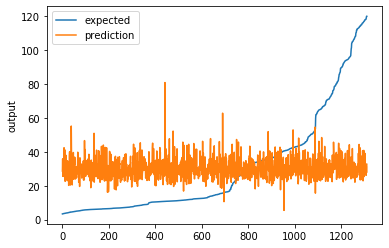

In [32]:
# Plot the chart
chart_regression(pred.flatten(),Y_test)

# Neural Network with Relu Activation Function and Sgd Optimizer


In [33]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(32,input_dim=X_train.shape[1], activation='relu')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    #model_regression.add(Dense(16,activation='relu')) # Hidden 2
    #model_regression.add(Dropout(0.10))
    #model_regression.add(Dense(32,activation='relu'))
    #model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, Y_train,validation_data=(X_test,Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 1s - loss: 1110.6737 - val_loss: 1465.0407
Epoch 2/1000
 - 0s - loss: 1004.2948 - val_loss: 963.9589
Epoch 3/1000
 - 0s - loss: 960.4907 - val_loss: 963.1709
Epoch 4/1000
 - 0s - loss: 928.7751 - val_loss: 938.3359
Epoch 5/1000
 - 0s - loss: 909.4124 - val_loss: 927.0309
Epoch 6/1000
 - 0s - loss: 900.8276 - val_loss: 923.5670
Epoch 7/1000
 - 0s - loss: 892.7644 - val_loss: 916.9295
Epoch 8/1000
 - 0s - loss: 890.1764 - val_loss: 916.6259
Epoch 9/1000
 - 0s - loss: 888.7069 - val_loss: 918.9097
Epoch 10/1000
 - 0s - loss: 888.1969 - val_loss: 920.2549
Epoch 11/1000
 - 0s - loss: 890.0058 - val_loss: 921.7761
Epoch 12/1000
 - 0s - loss: 890.2208 - val_loss: 921.0666
Epoch 13/1000
 - 0s - loss: 888.1439 - val_loss: 919.3338
Epoch 00013: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 1s - loss: 1137.8855 - val_loss: 1009.2842
Epoch 2/1000
 - 0s - loss: 1005.2232 - val_loss: 994.5864
Epoch 3

C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks.py:543: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks.py:436: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


Epoch 4/1000
 - 0s - loss: nan - val_loss: nan
Epoch 5/1000
 - 0s - loss: nan - val_loss: nan
Epoch 6/1000
 - 0s - loss: nan - val_loss: nan
Epoch 00006: early stopping
4
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 1s - loss: 1108.7567 - val_loss: 1049.8026
Epoch 2/1000
 - 0s - loss: 1003.9971 - val_loss: 972.7692
Epoch 3/1000
 - 0s - loss: nan - val_loss: nan
Epoch 4/1000
 - 0s - loss: nan - val_loss: nan
Epoch 5/1000
 - 0s - loss: nan - val_loss: nan
Epoch 6/1000
 - 0s - loss: nan - val_loss: nan
Epoch 7/1000
 - 0s - loss: nan - val_loss: nan
Epoch 00007: early stopping


In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights2.hdf5")

pred2 = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred2,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred2,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 915.8616405588006
Final score (RMSE): 30.263206052214635


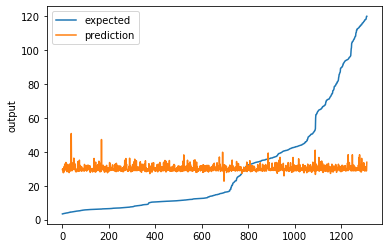

In [35]:
# Plot the chart
chart_regression(pred2.flatten(),Y_test)

# Neural Network with Sigmoid Activation Function and Adam Optimizer


In [36]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='sigmoid')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='sigmoid'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, Y_train,validation_data=(X_test,Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 1499.5575 - val_loss: 1398.8291
Epoch 2/1000
 - 0s - loss: 1305.6392 - val_loss: 1264.8242
Epoch 3/1000
 - 1s - loss: 1184.5450 - val_loss: 1158.9477
Epoch 4/1000
 - 1s - loss: 1094.5491 - val_loss: 1082.7745
Epoch 5/1000
 - 0s - loss: 1029.0597 - val_loss: 1028.2498
Epoch 6/1000
 - 0s - loss: 983.3321 - val_loss: 989.0104
Epoch 7/1000
 - 1s - loss: 949.9919 - val_loss: 962.8315
Epoch 8/1000
 - 1s - loss: 926.8369 - val_loss: 944.1567
Epoch 9/1000
 - 1s - loss: 914.1429 - val_loss: 932.6590
Epoch 10/1000
 - 0s - loss: 900.2851 - val_loss: 925.2190
Epoch 11/1000
 - 0s - loss: 895.4390 - val_loss: 920.7549
Epoch 12/1000
 - 0s - loss: 890.8437 - val_loss: 918.0922
Epoch 13/1000
 - 0s - loss: 893.1921 - val_loss: 916.6743
Epoch 14/1000
 - 1s - loss: 889.4283 - val_loss: 915.7661
Epoch 15/1000
 - 1s - loss: 888.8178 - val_loss: 915.3207
Epoch 16/1000
 - 1s - loss: 890.3697 - val_loss: 915.1531
Epoch 17/1000
 - 1s -

Epoch 12/1000
 - 0s - loss: 897.3187 - val_loss: 918.4091
Epoch 13/1000
 - 0s - loss: 895.1529 - val_loss: 916.9731
Epoch 14/1000
 - 0s - loss: 889.4478 - val_loss: 915.9226
Epoch 15/1000
 - 0s - loss: 886.4306 - val_loss: 915.5408
Epoch 16/1000
 - 0s - loss: 885.8276 - val_loss: 915.2293
Epoch 17/1000
 - 0s - loss: 888.1482 - val_loss: 915.1333
Epoch 18/1000
 - 0s - loss: 890.5062 - val_loss: 915.0220
Epoch 19/1000
 - 0s - loss: 890.0185 - val_loss: 915.0214
Epoch 20/1000
 - 0s - loss: 892.2953 - val_loss: 915.0026
Epoch 21/1000
 - 0s - loss: 888.0724 - val_loss: 915.0047
Epoch 22/1000
 - 0s - loss: 889.6988 - val_loss: 915.0030
Epoch 23/1000
 - 1s - loss: 890.9243 - val_loss: 915.0005
Epoch 24/1000
 - 0s - loss: 888.7980 - val_loss: 914.9997
Epoch 25/1000
 - 0s - loss: 890.3038 - val_loss: 914.9999
Epoch 26/1000
 - 0s - loss: 888.3087 - val_loss: 915.0011
Epoch 27/1000
 - 0s - loss: 891.5807 - val_loss: 914.9997
Epoch 28/1000
 - 0s - loss: 893.9778 - val_loss: 915.0014
Epoch 29/1000


In [37]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights3.hdf5")

pred3 = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred3,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred3,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 914.9996147177392
Final score (RMSE): 30.24896055598835


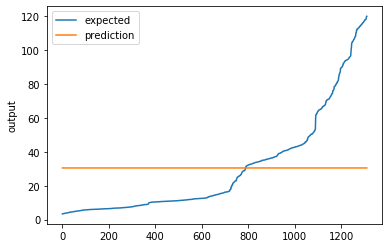

In [38]:
# Plot the chart
chart_regression(pred3.flatten(),Y_test)

# Neural Network with Sigmoid Activation Function and Sgd Optimizer

In [39]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='sigmoid')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='sigmoid')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='sigmoid'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, Y_train,validation_data=(X_test,Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 920.6265 - val_loss: 915.0258
Epoch 2/1000
 - 0s - loss: 901.8536 - val_loss: 953.1437
Epoch 3/1000
 - 0s - loss: 904.9460 - val_loss: 938.0120
Epoch 4/1000
 - 0s - loss: 904.2942 - val_loss: 918.4924
Epoch 5/1000
 - 1s - loss: 903.3808 - val_loss: 919.2934
Epoch 6/1000
 - 0s - loss: 905.6849 - val_loss: 914.9540
Epoch 7/1000
 - 0s - loss: 899.3492 - val_loss: 925.6417
Epoch 8/1000
 - 0s - loss: 899.0319 - val_loss: 918.2455
Epoch 9/1000
 - 1s - loss: 899.1113 - val_loss: 918.7479
Epoch 10/1000
 - 0s - loss: 896.0334 - val_loss: 983.3490
Epoch 11/1000
 - 1s - loss: 901.8905 - val_loss: 916.3359
Epoch 00011: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 918.1040 - val_loss: 931.3096
Epoch 2/1000
 - 0s - loss: 906.9316 - val_loss: 965.9759
Epoch 3/1000
 - 1s - loss: 907.0080 - val_loss: 922.8152
Epoch 4/1000
 - 1s - loss: 898.2165 - val_loss: 915.5119
Epoch 5/1000
 -

In [40]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights4.hdf5")

pred4 = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred4,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred4,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 914.1900820545821
Final score (RMSE): 30.235576430003483


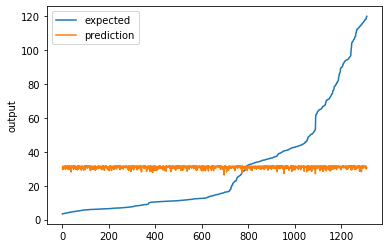

In [41]:
# Plot the chart
chart_regression(pred4.flatten(),Y_test)

# Neural Network with Tanh Activation Function and Adam Optimizer


In [42]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='tanh')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='tanh'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, Y_train,validation_data=(X_test,Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 1603.4939 - val_loss: 1245.2977
Epoch 2/1000
 - 0s - loss: 1101.9263 - val_loss: 1051.1095
Epoch 3/1000
 - 0s - loss: 984.5791 - val_loss: 977.0525
Epoch 4/1000
 - 1s - loss: 930.8456 - val_loss: 940.4602
Epoch 5/1000
 - 0s - loss: 904.5422 - val_loss: 925.0254
Epoch 6/1000
 - 0s - loss: 891.5462 - val_loss: 918.3650
Epoch 7/1000
 - 0s - loss: 895.4212 - val_loss: 932.0892
Epoch 8/1000
 - 0s - loss: 893.3519 - val_loss: 915.2126
Epoch 9/1000
 - 0s - loss: 887.8473 - val_loss: 914.8988
Epoch 10/1000
 - 0s - loss: 887.8572 - val_loss: 915.3690
Epoch 11/1000
 - 0s - loss: 883.6579 - val_loss: 916.2907
Epoch 12/1000
 - 1s - loss: 892.4640 - val_loss: 915.8100
Epoch 13/1000
 - 0s - loss: 890.8450 - val_loss: 920.6364
Epoch 14/1000
 - 1s - loss: 887.0545 - val_loss: 918.5686
Epoch 00014: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 1606.7283 - val_loss: 1232.6006
Epoch 

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights5.hdf5")

pred5 = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred5,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred5,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 914.8987997637324
Final score (RMSE): 30.24729408994683


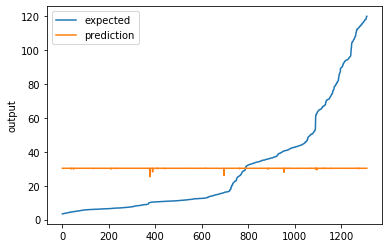

In [44]:
# Plot the chart
chart_regression(pred5.flatten(),Y_test)

# Neural Network with Tanh Activation Function and Sgd Optimizer

In [45]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model_regression= Sequential()
    model_regression.add(Dense(150,input_dim=X_train.shape[1], activation='tanh')) # Hidden 1     #  why input_dim=x.shape[1]?  
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(100,activation='tanh')) # Hidden 2
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(50,activation='tanh'))
    model_regression.add(Dropout(0.10))
    model_regression.add(Dense(1))
    
    #model_regression.add(Dense(y_train.shape[2],activation='softmax')) # Output
    model_regression.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    
    model_regression.fit(X_train, Y_train,validation_data=(X_test,Y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 1015.4675 - val_loss: 956.1412
Epoch 2/1000
 - 0s - loss: 903.7933 - val_loss: 917.7943
Epoch 3/1000
 - 0s - loss: 918.8465 - val_loss: 936.0437
Epoch 4/1000
 - 1s - loss: 909.2409 - val_loss: 1007.3374
Epoch 5/1000
 - 1s - loss: 909.7838 - val_loss: 968.8948
Epoch 6/1000
 - 1s - loss: 910.7878 - val_loss: 1030.2801
Epoch 7/1000
 - 1s - loss: 912.5432 - val_loss: 932.7011
Epoch 00007: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 2s - loss: 978.1481 - val_loss: 939.9749
Epoch 2/1000
 - 0s - loss: 908.9074 - val_loss: 1022.1310
Epoch 3/1000
 - 1s - loss: 919.0299 - val_loss: 925.3222
Epoch 4/1000
 - 0s - loss: 916.3991 - val_loss: 926.7379
Epoch 5/1000
 - 1s - loss: 917.1800 - val_loss: 930.8209
Epoch 6/1000
 - 1s - loss: 905.9347 - val_loss: 1011.4715
Epoch 7/1000
 - 1s - loss: 910.6245 - val_loss: 1013.8577
Epoch 8/1000
 - 1s - loss: 912.6784 - val_loss: 924.2338
Epoch 9/100

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model_regression.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\weights6.hdf5")

pred6 = model_regression.predict(X_test)

score = metrics.mean_squared_error(pred6,Y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred6,Y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 917.794323084535
Final score (RMSE): 30.295120450074712


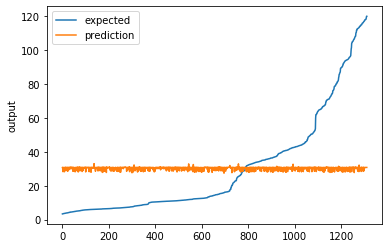

In [47]:
# Plot the chart
chart_regression(pred6.flatten(),Y_test)

# LSTM

In [4]:
#Removed missing data
dff=pd.read_csv('CSC215_P2_Stock_Price.csv', na_values=[' ','?'])
dff[data.isnull().any(axis=1)]

,Date,Open,High,Low,Close,Adj_Close,Volume


In [5]:
#Removing Date and Adj_Close columns from the data
print("Before drop: {}".format(dff.columns))
dff = dff.drop(['Date','Adj_Close'],axis = 1)
print("After drop: {}".format(dff.columns))


Before drop: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')
After drop: Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [6]:
dff['Close_y']= dff['Close']
dff.head()

,Open,High,Low,Close,Volume,Close_y
0,3.812500,4.156250,3.812500,4.125000,3675600,4.125000
1,4.125000,4.125000,4.000000,4.015625,1077600,4.015625
2,4.000000,4.031250,3.953125,4.000000,437200,4.000000
3,4.000000,4.000000,3.843750,3.843750,1883600,3.843750
4,3.734375,3.734375,3.390625,3.390625,7931600,3.390625


In [7]:
dff=dff[['Open', 'High', 'Low','Volume','Close','Close_y']]

In [8]:
#Normalizing the training numeric values using zscore
from scipy.stats import zscore
dff['Open'] = zscore(dff['Open'])
dff['High'] = zscore(dff['High'])
dff['Low'] = zscore(dff['Low'])
dff['Volume'] = zscore(dff['Volume'])
dff['Close'] = zscore(dff['Close'])

In [9]:
dff.head()

,Open,High,Low,Volume,Close,Close_y
0,-0.894311,-0.885122,-0.892408,1.104938,-0.884464,4.125000
1,-0.883863,-0.886157,-0.886076,-0.497357,-0.888122,4.015625
2,-0.888042,-0.889261,-0.887659,-0.892319,-0.888645,4.000000
3,-0.888042,-0.890295,-0.891353,-0.000263,-0.893870,3.843750
4,-0.896922,-0.899088,-0.906655,3.729791,-0.909023,3.390625


In [10]:
train=dff[:3074]
test=dff[3074:]
x_train=train[['Open', 'High', 'Low', 'Volume', 'Close']]
x_test=test[['Open', 'High', 'Low', 'Volume', 'Close']]
y_train=train['Close_y'].tolist()
y_test=test['Close_y'].tolist()
x_train=x_train.as_matrix()
x_test=x_test.as_matrix()

C:\Users\veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
C:\Users\veena\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [13]:
import numpy as np

def to_sequences(seq_size, data1,data2):
    x = []
    y = []

    for i in range(len(data1)-SEQUENCE_SIZE-1):
        #print(i)
        window = data1[i:(i+SEQUENCE_SIZE)]
        after_window = data2[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

In [14]:
SEQUENCE_SIZE = 7
x_train,y_train = to_sequences(SEQUENCE_SIZE,x_train,y_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,x_test,y_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3066, 7, 1, 5)
Shape of x_test: (1310, 7, 1, 5)
Shape of y_train: (3066,)
Shape of y_test: (1310,)


In [15]:
x_train=x_train.reshape(3066,7,5)
x_test=x_test.reshape(1310,7,5)

In [16]:
xx_train=x_train.reshape(3066,1,7,5)
xx_test=x_test.reshape(1310,1,7,5)

# LSTM with Relu Activation Function and Adam Optimizer without dropout layer with 20 epochs


In [28]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)  


Using TensorFlow backend.
W1009 11:09:02.876183  1280 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1009 11:09:02.919787  1280 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1009 11:09:02.931755  1280 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Build model...
0


W1009 11:09:03.201819  1280 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W1009 11:09:03.225862  1280 deprecation.py:506] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W1009 11:09:03.697905  1280 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Train...


W1009 11:09:04.068568  1280 deprecation.py:323] From C:\Users\veena\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1009 11:09:05.312241  1280 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 6s - loss: 300.6672 - val_loss: 671556.1725
Epoch 2/20
 - 4s - loss: 296.9685 - val_loss: 22424.9848
Epoch 3/20
 - 2s - loss: 46.6197 - val_loss: 38508.4424
Epoch 4/20
 - 3s - loss: 16.2139 - val_loss: 14401.9067
Epoch 5/20
 - 1s - loss: 8.7339 - val_loss: 13997.1956
Epoch 6/20
 - 2s - loss: 9.0364 - val_loss: 5759.4771
Epoch 7/20
 - 1s - loss: 7.4222 - val_loss: 6017.4859
Epoch 8/20
 - 13s - loss: 6.8128 - val_loss: 3286.6505
Epoch 9/20
 - 3s - loss: 5.8721 - val_loss: 3458.7062
Epoch 10/20
 - 4s - loss: 5.3718 - val_loss: 3476.2886
Epoch 11/20
 - 1s - loss: 4.8281 - val_loss: 3110.8148
Epoch 12/20
 - 2s - loss: 4.5055 - val_loss: 3534.4988
Epoch 13/20
 - 2s - loss: 4.2952 - val_loss: 3357.3803
Epoch 14/20
 - 2s - loss: 4.4739 - val_loss: 2715.3956
Epoch 15/20
 - 1s - loss: 3.9140 - val_loss: 2451.3516
Epoch 16/20
 - 1s - loss: 3.7103 - val_loss: 2209.7122
Epoch 17/20
 - 1s - loss: 3.3930 - val_loss: 2292.3737
Epoch 18/20
 

In [29]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights.hdf5")

pred = model.predict(x_test)

score = metrics.mean_squared_error(pred,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 6.824261813783177
Final score (RMSE): 2.6123288104262787


In [46]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred.flatten(),y_test)

NameError: name 'pred' is not defined

# LSTM with Relu Activation Function and Adam Optimizer without dropout layer with 10 epochs

In [32]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weightsE2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10)  


Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 8s - loss: 333.7509 - val_loss: 11053.6135
Epoch 2/10
 - 1s - loss: 117.9153 - val_loss: 74582.7501
Epoch 3/10
 - 2s - loss: 44.4060 - val_loss: 182.4066
Epoch 4/10
 - 1s - loss: 13.5995 - val_loss: 765.6449
Epoch 5/10
 - 3s - loss: 8.8531 - val_loss: 615.7496
Epoch 6/10
 - 5s - loss: 7.3970 - val_loss: 528.2486
Epoch 7/10
 - 1s - loss: 6.2355 - val_loss: 592.3831
Epoch 8/10
 - 5s - loss: 5.3589 - val_loss: 366.6907
Epoch 00008: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 7s - loss: 279.8571 - val_loss: 966410.6204
Epoch 2/10
 - 2s - loss: 77.0413 - val_loss: 72232.7741
Epoch 3/10
 - 8s - loss: 25.7433 - val_loss: 4672.0185
Epoch 4/10
 - 6s - loss: 9.9246 - val_loss: 1407.0847
Epoch 5/10
 - 3s - loss: 6.5031 - val_loss: 887.0373
Epoch 6/10
 - 2s - loss: 5.7271 - val_loss: 66.0085
Epoch 7/10
 - 4s - loss: 4.6611 - val_loss: 78.6670
Epoch 8/10
 - 3s - loss: 

In [33]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weightsE2.hdf5")

predE2 = model.predict(x_test)

score = metrics.mean_squared_error(predE2,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(predE2,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 50.091976605911
Final score (RMSE): 7.077568551834097


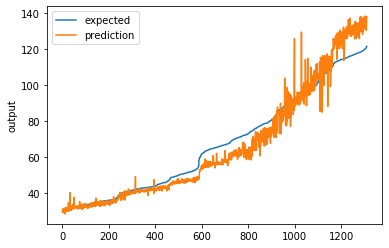

In [34]:
# Plot the chart
chart_regression(predE2.flatten(),y_test)

# LSTM with Relu Activation Function and Adam Optimizer with dropout layer with 10 epochs

In [35]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weightsD.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=10) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 7s - loss: 213.5972 - val_loss: 378912.0338
Epoch 2/10
 - 1s - loss: 77.1549 - val_loss: 45798.6535
Epoch 3/10
 - 2s - loss: 25.1413 - val_loss: 4731.6260
Epoch 4/10
 - 3s - loss: 14.9143 - val_loss: 1303.5784
Epoch 5/10
 - 1s - loss: 11.6245 - val_loss: 67.1508
Epoch 6/10
 - 3s - loss: 10.1921 - val_loss: 11.2675
Epoch 7/10
 - 3s - loss: 8.6223 - val_loss: 22.1897
Epoch 8/10
 - 2s - loss: 8.0529 - val_loss: 25.5688
Epoch 9/10
 - 4s - loss: 7.8238 - val_loss: 46.6172
Epoch 10/10
 - 2s - loss: 7.4036 - val_loss: 36.9770
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/10
 - 8s - loss: 249.3620 - val_loss: 156221.5406
Epoch 2/10
 - 3s - loss: 457.2477 - val_loss: 172698.4735
Epoch 3/10
 - 1s - loss: 52.0297 - val_loss: 22210.8554
Epoch 4/10
 - 2s - loss: 24.7775 - val_loss: 6144.6925
Epoch 5/10
 - 2s - loss: 18.2774 - val_loss: 1718.1076
Epoch 6/10
 - 2s - loss: 15.5012 - val_loss: 1

In [41]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weightsD.hdf5")

predD = model.predict(x_test)

score = metrics.mean_squared_error(predD,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(predD,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 11.267509550163519
Final score (RMSE): 3.3567111210474336


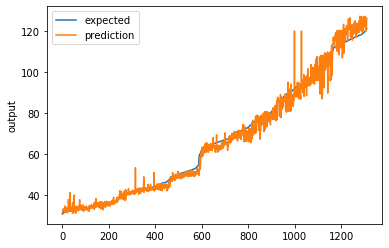

In [42]:
# Plot the chart
chart_regression(predD.flatten(),y_test)

# LSTM with Relu Activation Function and Adam Optimizer with dropout layer with 20 epochs

In [39]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weightsDE2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 11s - loss: 249.2190 - val_loss: 333542.9985
Epoch 2/20
 - 3s - loss: 52.2662 - val_loss: 33838.0438
Epoch 3/20
 - 2s - loss: 23.2142 - val_loss: 3003.8934
Epoch 4/20
 - 3s - loss: 14.2596 - val_loss: 156.6291
Epoch 5/20
 - 3s - loss: 11.9484 - val_loss: 29.0062
Epoch 6/20
 - 2s - loss: 10.2973 - val_loss: 82.9564
Epoch 7/20
 - 2s - loss: 9.4108 - val_loss: 148.5619
Epoch 8/20
 - 1s - loss: 9.1998 - val_loss: 161.9692
Epoch 9/20
 - 3s - loss: 8.7075 - val_loss: 269.5793
Epoch 10/20
 - 5s - loss: 7.9007 - val_loss: 313.8484
Epoch 00010: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 10s - loss: 247.2818 - val_loss: 479747.2881
Epoch 2/20
 - 3s - loss: 72.3794 - val_loss: 13372.1382
Epoch 3/20
 - 2s - loss: 22.6651 - val_loss: 263.3212
Epoch 4/20
 - 2s - loss: 14.7853 - val_loss: 19.2417
Epoch 5/20
 - 2s - loss: 12.5545 - val_loss: 106.9399
Epoch 6/20
 - 4s - l

In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weightsDE2.hdf5")

predDE2 = model.predict(x_test)

score = metrics.mean_squared_error(predDE2,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(predDE2,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 19.241709592535717
Final score (RMSE): 4.3865373123382545


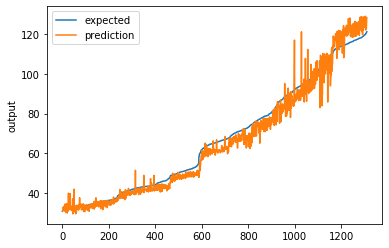

In [44]:
# Plot the chart
chart_regression(predDE2.flatten(),y_test)

# LSTM with Relu Activation Function and Sgd Optimizer without dropout layer with 20 epochs 

In [45]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(16, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='relu'))
    #model.add(Dense(32,activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 7s - loss: 145.4797 - val_loss: 3122346.6183
Epoch 2/20
 - 1s - loss: 20.2346 - val_loss: 3082773.5032
Epoch 3/20
 - 1s - loss: 10.5307 - val_loss: 3084418.0403
Epoch 4/20
 - 1s - loss: 6.6359 - val_loss: 3068827.6183
Epoch 5/20
 - 1s - loss: 4.3653 - val_loss: 3064070.2361
Epoch 6/20
 - 1s - loss: 3.3178 - val_loss: 3070437.7419
Epoch 7/20
 - 1s - loss: 2.5763 - val_loss: 3070333.0706
Epoch 8/20
 - 1s - loss: 2.4566 - val_loss: 3057415.3028
Epoch 9/20
 - 1s - loss: 1.9288 - val_loss: 3083721.1768
Epoch 10/20
 - 2s - loss: 1.6480 - val_loss: 3076198.4541
Epoch 11/20
 - 2s - loss: 1.5270 - val_loss: 3082235.7867
Epoch 12/20
 - 2s - loss: 1.7457 - val_loss: 3091339.7649
Epoch 13/20
 - 2s - loss: 1.5315 - val_loss: 3083797.0496
Epoch 00013: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 7s - loss: nan - val_loss: nan
Epoch 2/20


C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks.py:543: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks.py:436: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


 - 1s - loss: nan - val_loss: nan
Epoch 3/20
 - 1s - loss: nan - val_loss: nan
Epoch 4/20
 - 1s - loss: nan - val_loss: nan
Epoch 5/20
 - 1s - loss: nan - val_loss: nan
Epoch 00005: early stopping
2
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 7s - loss: nan - val_loss: nan
Epoch 2/20
 - 1s - loss: nan - val_loss: nan
Epoch 3/20
 - 1s - loss: nan - val_loss: nan
Epoch 4/20
 - 1s - loss: nan - val_loss: nan
Epoch 5/20
 - 1s - loss: nan - val_loss: nan
Epoch 00005: early stopping
3
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 7s - loss: nan - val_loss: nan
Epoch 2/20
 - 1s - loss: nan - val_loss: nan
Epoch 3/20
 - 1s - loss: nan - val_loss: nan
Epoch 4/20
 - 1s - loss: nan - val_loss: nan
Epoch 5/20
 - 1s - loss: nan - val_loss: nan
Epoch 00005: early stopping
4
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 8s - loss: nan - val_loss: nan
Epoch 2/20
 - 1s - loss: nan - val_loss: nan
Epoch 3/20
 - 1s - loss: nan -

In [46]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights2.hdf5")

pred2 = model.predict(x_test)

score = metrics.mean_squared_error(pred2,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred2,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 3057415.287062652
Final score (RMSE): 1748.54662135805


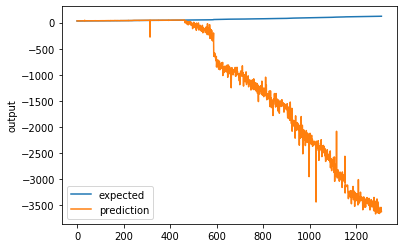

In [47]:
# Plot the chart
chart_regression(pred2.flatten(),y_test)

# LSTM with Relu Activation Function and Sgd Optimizer with dropout layer with 20 epochs

In [72]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights2D.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(16, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'relu'))
    model.add(Dropout(0.10))
    #model.add(Dense(32,activation='relu'))
    #model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 18s - loss: nan - val_loss: nan
Epoch 2/20


C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks.py:543: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current - self.min_delta, self.best):
C:\Users\veena\Anaconda3\lib\site-packages\keras\callbacks.py:436: RuntimeWarning: invalid value encountered in less
  if self.monitor_op(current, self.best):


 - 2s - loss: nan - val_loss: nan
Epoch 3/20
 - 2s - loss: nan - val_loss: nan
Epoch 4/20
 - 1s - loss: nan - val_loss: nan
Epoch 5/20
 - 2s - loss: nan - val_loss: nan
Epoch 00005: early stopping
1
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 21s - loss: nan - val_loss: nan
Epoch 2/20
 - 2s - loss: nan - val_loss: nan
Epoch 3/20
 - 2s - loss: nan - val_loss: nan
Epoch 4/20
 - 1s - loss: nan - val_loss: nan
Epoch 5/20
 - 2s - loss: nan - val_loss: nan
Epoch 00005: early stopping
2
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 20s - loss: nan - val_loss: nan
Epoch 2/20
 - 3s - loss: nan - val_loss: nan
Epoch 3/20
 - 3s - loss: nan - val_loss: nan
Epoch 4/20
 - 2s - loss: nan - val_loss: nan
Epoch 5/20
 - 1s - loss: nan - val_loss: nan
Epoch 00005: early stopping
3
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 27s - loss: nan - val_loss: nan
Epoch 2/20
 - 2s - loss: nan - val_loss: nan
Epoch 3/20
 - 2s - loss: na

# LSTM with Sigmoid Activation Function and Adam Optimizer without dropout layer with 20 epochs

In [48]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='sigmoid'))
    model.add(Dense(32,activation='sigmoid'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 8s - loss: 250.5358 - val_loss: 4594.7297
Epoch 2/20
 - 1s - loss: 191.1521 - val_loss: 4381.6449
Epoch 3/20
 - 2s - loss: 167.3863 - val_loss: 4211.4907
Epoch 4/20
 - 2s - loss: 149.7555 - val_loss: 4044.8942
Epoch 5/20
 - 2s - loss: 137.4921 - val_loss: 3910.9242
Epoch 6/20
 - 2s - loss: 129.5302 - val_loss: 3797.9672
Epoch 7/20
 - 1s - loss: 125.0345 - val_loss: 3713.5022
Epoch 8/20
 - 3s - loss: 122.6919 - val_loss: 3656.1655
Epoch 9/20
 - 1s - loss: 121.5485 - val_loss: 3613.1429
Epoch 10/20
 - 2s - loss: 121.0150 - val_loss: 3584.1851
Epoch 11/20
 - 1s - loss: 120.7825 - val_loss: 3562.0865
Epoch 12/20
 - 2s - loss: 120.6784 - val_loss: 3550.8264
Epoch 13/20
 - 4s - loss: 120.6181 - val_loss: 3544.1042
Epoch 14/20
 - 3s - loss: 120.5674 - val_loss: 3537.8514
Epoch 15/20
 - 3s - loss: 120.2607 - val_loss: 3536.6071
Epoch 16/20
 - 3s - loss: 105.0843 - val_loss: 3397.7230
Epoch 17/20
 - 3s - los

In [49]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights3.hdf5")

pred3 = model.predict(x_test)

score = metrics.mean_squared_error(pred3,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred3,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 2330.350491282553
Final score (RMSE): 48.27370393167022


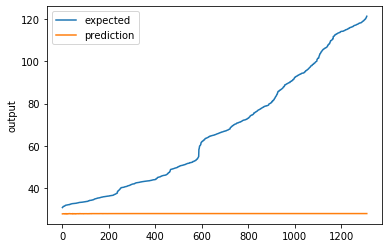

In [54]:
# Plot the chart
chart_regression(pred3.flatten(),y_test)

# LSTM with Sigmoid Activation Function and Adam Optimizer with dropout layer with 20 epochs

In [53]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights3D.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 15s - loss: 224.9662 - val_loss: 4402.8030
Epoch 2/20
 - 3s - loss: 164.6440 - val_loss: 4137.2520
Epoch 3/20
 - 3s - loss: 142.8127 - val_loss: 3945.8648
Epoch 4/20
 - 2s - loss: 131.5151 - val_loss: 3803.5121
Epoch 5/20
 - 3s - loss: 125.9993 - val_loss: 3708.8677
Epoch 6/20
 - 4s - loss: 123.3565 - val_loss: 3639.9154
Epoch 7/20
 - 2s - loss: 122.1993 - val_loss: 3599.1201
Epoch 8/20
 - 2s - loss: 121.3909 - val_loss: 3572.7885
Epoch 9/20
 - 2s - loss: 122.3873 - val_loss: 3554.6156
Epoch 10/20
 - 3s - loss: 121.0691 - val_loss: 3546.9832
Epoch 11/20
 - 1s - loss: 114.4348 - val_loss: 3505.7799
Epoch 12/20
 - 2s - loss: 89.4202 - val_loss: 3285.2917
Epoch 13/20
 - 2s - loss: 69.3799 - val_loss: 3070.9035
Epoch 14/20
 - 2s - loss: 56.2236 - val_loss: 2890.1024
Epoch 15/20
 - 2s - loss: 46.5036 - val_loss: 2737.3646
Epoch 16/20
 - 2s - loss: 38.8539 - val_loss: 2600.0410
Epoch 17/20
 - 3s - loss: 3

In [55]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights3D.hdf5")

pred3D = model.predict(x_test)

score = metrics.mean_squared_error(pred3D,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred3D,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 2202.455352225166
Final score (RMSE): 46.93032444193376


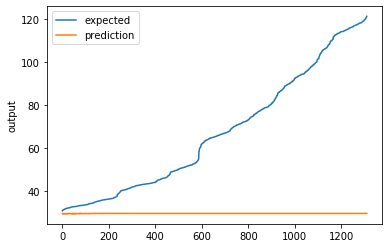

In [56]:
# Plot the chart
chart_regression(pred3D.flatten(),y_test)

# LSTM with Sigmoid Activation Function and Sgd Optimizer without dropout layer with 20 epohcs


In [57]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='sigmoid'))
    model.add(Dense(32,activation='sigmoid'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 14s - loss: 104.3047 - val_loss: 1952.4058
Epoch 2/20
 - 2s - loss: 7.3977 - val_loss: 1338.7722
Epoch 3/20
 - 3s - loss: 5.1682 - val_loss: 1295.8225
Epoch 4/20
 - 3s - loss: 4.9168 - val_loss: 1256.9677
Epoch 5/20
 - 2s - loss: 4.7714 - val_loss: 1220.6896
Epoch 6/20
 - 3s - loss: 4.0160 - val_loss: 1210.3052
Epoch 7/20
 - 2s - loss: 3.8569 - val_loss: 1167.7094
Epoch 8/20
 - 2s - loss: 3.5956 - val_loss: 1140.7966
Epoch 9/20
 - 3s - loss: 3.5271 - val_loss: 1122.1657
Epoch 10/20
 - 3s - loss: 3.2672 - val_loss: 1098.7637
Epoch 11/20
 - 3s - loss: 3.2858 - val_loss: 1084.9103
Epoch 12/20
 - 2s - loss: 2.9312 - val_loss: 1081.8466
Epoch 13/20
 - 3s - loss: 2.7743 - val_loss: 1059.9583
Epoch 14/20
 - 3s - loss: 2.8435 - val_loss: 1037.0471
Epoch 15/20
 - 2s - loss: 2.8858 - val_loss: 1036.5903
Epoch 16/20
 - 5s - loss: 2.7067 - val_loss: 1032.3378
Epoch 17/20
 - 3s - loss: 2.8573 - val_loss: 1023.85

In [63]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights4.hdf5")

pred4 = model.predict(x_test)

score = metrics.mean_squared_error(pred4,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred4,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 1002.1969716121209
Final score (RMSE): 31.65749471471362


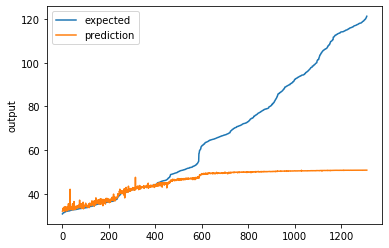

In [61]:
# Plot the chart
chart_regression(pred4.flatten(),y_test)

# LSTM with Sigmoid Activation Function and Sgd Optimizer with dropout layer with 20 epohcs

In [58]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights4D.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='sigmoid'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 19s - loss: 111.3913 - val_loss: 2272.3058
Epoch 2/20
 - 1s - loss: 11.5933 - val_loss: 1390.2745
Epoch 3/20
 - 2s - loss: 8.1281 - val_loss: 1406.9513
Epoch 4/20
 - 2s - loss: 7.7705 - val_loss: 1324.7665
Epoch 5/20
 - 2s - loss: 7.0723 - val_loss: 1312.6558
Epoch 6/20
 - 3s - loss: 7.2808 - val_loss: 1306.1668
Epoch 7/20
 - 1s - loss: 6.7704 - val_loss: 1279.9641
Epoch 8/20
 - 2s - loss: 6.5351 - val_loss: 1252.2600
Epoch 9/20
 - 4s - loss: 6.1499 - val_loss: 1260.7397
Epoch 10/20
 - 4s - loss: 6.2947 - val_loss: 1254.1746
Epoch 11/20
 - 5s - loss: 6.2954 - val_loss: 1240.3341
Epoch 12/20
 - 3s - loss: 5.8492 - val_loss: 1224.8013
Epoch 13/20
 - 3s - loss: 6.0898 - val_loss: 1229.9703
Epoch 14/20
 - 2s - loss: 6.0012 - val_loss: 1229.0288
Epoch 15/20
 - 3s - loss: 5.6855 - val_loss: 1221.2733
Epoch 16/20
 - 2s - loss: 5.0535 - val_loss: 1194.5502
Epoch 17/20
 - 2s - loss: 5.4887 - val_loss: 1209.8

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights4D.hdf5")

pred4D = model.predict(x_test)

score = metrics.mean_squared_error(pred4D,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred4D,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 1168.147551581698
Final score (RMSE): 34.17817361389719


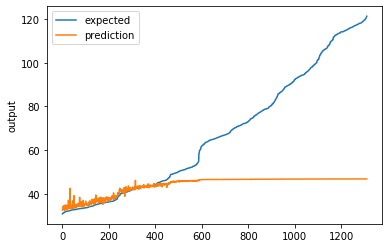

In [60]:
# Plot the chart
chart_regression(pred4D.flatten(),y_test)

# LSTM with Tanh Activation Function and Adam Optimizer without dropout layer with 20 epochs 


In [61]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='tanh'))
    model.add(Dense(32,activation='tanh'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 15s - loss: 233.8256 - val_loss: 4090.9226
Epoch 2/20
 - 2s - loss: 133.7918 - val_loss: 3781.0309
Epoch 3/20
 - 3s - loss: 123.3159 - val_loss: 3636.8351
Epoch 4/20
 - 2s - loss: 121.0353 - val_loss: 3571.8118
Epoch 5/20
 - 2s - loss: 101.0838 - val_loss: 3341.8686
Epoch 6/20
 - 3s - loss: 70.3251 - val_loss: 3036.8909
Epoch 7/20
 - 3s - loss: 50.8756 - val_loss: 2796.9745
Epoch 8/20
 - 2s - loss: 37.8161 - val_loss: 2597.6738
Epoch 9/20
 - 3s - loss: 28.4554 - val_loss: 2435.9777
Epoch 10/20
 - 2s - loss: 21.5615 - val_loss: 2299.8342
Epoch 11/20
 - 2s - loss: 16.5111 - val_loss: 2182.9625
Epoch 12/20
 - 2s - loss: 12.7966 - val_loss: 2082.1396
Epoch 13/20
 - 2s - loss: 9.8616 - val_loss: 1995.4139
Epoch 14/20
 - 2s - loss: 7.7809 - val_loss: 1921.4040
Epoch 15/20
 - 2s - loss: 6.1829 - val_loss: 1858.1540
Epoch 16/20
 - 2s - loss: 5.0921 - val_loss: 1802.4580
Epoch 17/20
 - 3s - loss: 4.1754 - va

In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights5.hdf5")

pred5 = model.predict(x_test)

score = metrics.mean_squared_error(pred5,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred5,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 1621.6919604238237
Final score (RMSE): 40.270236657161874


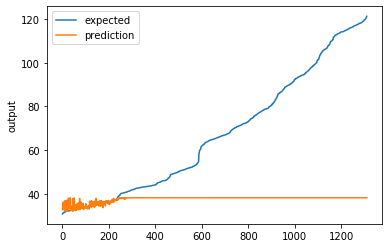

In [63]:
# Plot the chart
chart_regression(pred5.flatten(),y_test)

# LSTM with Tanh Activation Function and Adam Optimizer with dropout layer with 20 epochs 

In [64]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights5D.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'tanh'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='tanh'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20) 

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 15s - loss: 235.4518 - val_loss: 4110.2553
Epoch 2/20
 - 2s - loss: 136.2988 - val_loss: 3814.0267
Epoch 3/20
 - 2s - loss: 125.2085 - val_loss: 3654.4942
Epoch 4/20
 - 2s - loss: 121.8156 - val_loss: 3579.0426
Epoch 5/20
 - 8s - loss: 121.3856 - val_loss: 3549.2878
Epoch 6/20
 - 3s - loss: 121.2161 - val_loss: 3539.3965
Epoch 7/20
 - 5s - loss: 122.2372 - val_loss: 3534.9934
Epoch 8/20
 - 6s - loss: 104.5933 - val_loss: 3351.3193
Epoch 9/20
 - 2s - loss: 71.1643 - val_loss: 3011.0023
Epoch 10/20
 - 4s - loss: 50.7357 - val_loss: 2752.2392
Epoch 11/20
 - 2s - loss: 36.8078 - val_loss: 2547.6767
Epoch 12/20
 - 2s - loss: 28.4055 - val_loss: 2387.3354
Epoch 13/20
 - 4s - loss: 21.4726 - val_loss: 2252.5733
Epoch 14/20
 - 3s - loss: 17.1268 - val_loss: 2139.5941
Epoch 15/20
 - 2s - loss: 12.6634 - val_loss: 2045.3480
Epoch 16/20
 - 2s - loss: 10.0649 - val_loss: 1965.0112
Epoch 17/20
 - 3s - loss: 8.48

In [65]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights5D.hdf5")

pred5D = model.predict(x_test)

score = metrics.mean_squared_error(pred5D,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred5D,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 1572.113035680332
Final score (RMSE): 39.649880651526956


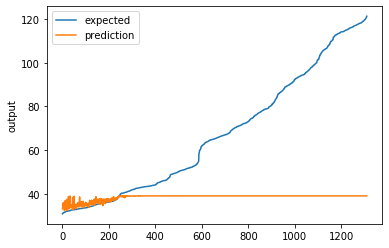

In [66]:
# Plot the chart
chart_regression(pred5D.flatten(),y_test)

# LSTM with Tanh Activation Function and Sgd Optimizer without dropout layer and with 20 epochs


In [61]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation='tanh'))
    model.add(Dense(32,activation='tanh'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)

Build model...
0
Train...


W1009 14:46:44.916557 12024 deprecation.py:323] From C:\Users\veena\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 5s - loss: 39.5472 - val_loss: 1517.4993
Epoch 2/20
 - 1s - loss: 6.8514 - val_loss: 1364.0081
Epoch 3/20
 - 1s - loss: 4.8239 - val_loss: 1286.2445
Epoch 4/20
 - 2s - loss: 3.4588 - val_loss: 1260.2097
Epoch 5/20
 - 1s - loss: 3.2893 - val_loss: 1257.7020
Epoch 6/20
 - 2s - loss: 3.2073 - val_loss: 1248.6258
Epoch 7/20
 - 1s - loss: 2.7974 - val_loss: 1241.4954
Epoch 8/20
 - 2s - loss: 2.6084 - val_loss: 1238.8265
Epoch 9/20
 - 2s - loss: 2.4677 - val_loss: 1225.2889
Epoch 10/20
 - 2s - loss: 2.6268 - val_loss: 1223.2841
Epoch 11/20
 - 1s - loss: 2.3166 - val_loss: 1212.8559
Epoch 12/20
 - 2s - loss: 2.2110 - val_loss: 1203.3908
Epoch 13/20
 - 1s - loss: 2.3090 - val_loss: 1211.1529
Epoch 14/20
 - 2s - loss: 1.8308 - val_loss: 1203.2313
Epoch 15/20
 - 1s - loss: 1.6061 - val_loss: 1195.8692
Epoch 16/20
 - 2s - loss: 1.6504 - val_loss: 1199.3119
Epoch 17/20
 - 1s - loss: 1.4714 - val_loss: 1200.3721
Epoch 18/20
 - 2s - loss:

In [62]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights6.hdf5")

pred6 = model.predict(x_test)

score = metrics.mean_squared_error(pred6,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred6,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 1195.8692018348002
Final score (RMSE): 34.58134181657502


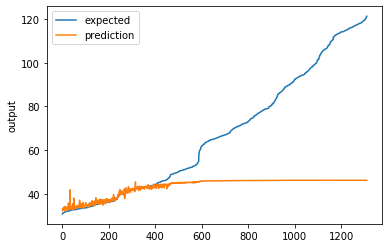

In [63]:
# Plot the chart
chart_regression(pred6.flatten(),y_test)

# LSTM with Tanh Activation Function and Sgd Optimizer with dropout layer and with 20 epochs

In [74]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

print('Build model...')
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights6D.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)
    model = Sequential()

    model.add(LSTM(64, dropout=0.1, recurrent_dropout=0.1, input_shape=(SEQUENCE_SIZE, 5),activation = 'tanh'))
    model.add(Dropout(0.10))
    model.add(Dense(32,activation='tanh'))
    model.add(Dropout(0.10))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='sgd')

    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
    print('Train...')

    model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor,checkpointer],verbose=2, epochs=20)

Build model...
0
Train...
Train on 3066 samples, validate on 1310 samples
Epoch 1/20
 - 18s - loss: 49.5531 - val_loss: 1706.2507
Epoch 2/20
 - 2s - loss: 10.7564 - val_loss: 1520.6670
Epoch 3/20
 - 2s - loss: 9.2340 - val_loss: 1475.1195
Epoch 4/20
 - 2s - loss: 6.9424 - val_loss: 1392.7881
Epoch 5/20
 - 2s - loss: 6.7613 - val_loss: 1401.8348
Epoch 6/20
 - 2s - loss: 5.4306 - val_loss: 1357.7128
Epoch 7/20
 - 2s - loss: 5.3848 - val_loss: 1351.9344
Epoch 8/20
 - 5s - loss: 4.6349 - val_loss: 1339.2496
Epoch 9/20
 - 5s - loss: 4.5371 - val_loss: 1318.7828
Epoch 10/20
 - 2s - loss: 3.9349 - val_loss: 1308.2550
Epoch 11/20
 - 2s - loss: 4.3591 - val_loss: 1331.3223
Epoch 12/20
 - 2s - loss: 4.2220 - val_loss: 1302.5144
Epoch 13/20
 - 2s - loss: 3.9190 - val_loss: 1310.1314
Epoch 14/20
 - 5s - loss: 4.0455 - val_loss: 1298.6416
Epoch 15/20
 - 5s - loss: 3.8529 - val_loss: 1307.9291
Epoch 16/20
 - 3s - loss: 3.9806 - val_loss: 1310.9641
Epoch 17/20
 - 2s - loss: 3.5144 - val_loss: 1293.73

In [75]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

model.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\lstm_weights6D.hdf5")

pred6D = model.predict(x_test)

score = metrics.mean_squared_error(pred6D,y_test)
print("Final score (MSE): {}".format(score))

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred6D,y_test))
print("Final score (RMSE): {}".format(score))

Final score (MSE): 1253.8686277886768
Final score (RMSE): 35.410007452536306


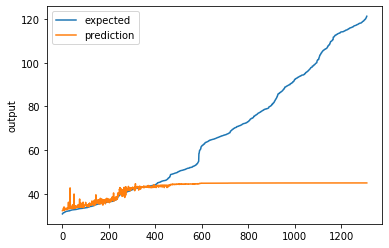

In [76]:
# Plot the chart
chart_regression(pred6D.flatten(),y_test)

#  CNN

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import numpy as np
from keras import optimizers
from keras.layers.core import Dense, Activation, Dropout

modelc = Sequential()
modelc.add(Conv2D(300,(3,3), padding='same',activation='relu',strides=(1,1), input_shape = (1,7,5)))
modelc.add(Conv2D(150,(3,3), padding='same',activation='relu',strides=(1,1)))
modelc.add(Conv2D(75,(3,3), padding='same',activation='relu',strides=(1,1)))
modelc.add(Activation('relu'))
modelc.add(Activation('relu'))
modelc.add(MaxPooling2D(pool_size=(1,1)))
modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(150,activation='sigmoid'))
modelc.add(Dropout(0.2))
modelc.add(Dense(250))
modelc.add(Dropout(0.2))
modelc.add(Dense(1))

modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 1, 7, 300)         13800     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 7, 150)         405150    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 1, 7, 75)          101325    
_________________________________________________________________
activation_3 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
activation_4 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 7, 75)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 7, 75)          0         
__________

In [18]:
xx_test.shape

(1310, 1, 7, 5)

In [19]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn1.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    modelc.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    modelc.fit(xx_train, y_train,batch_size=128,validation_data=(xx_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

W1009 14:54:25.859560  2104 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



0


W1009 14:54:26.307856  2104 deprecation_wrapper.py:119] From C:\Users\veena\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 3s - loss: 136.2730 - val_loss: 2254.4809
Epoch 2/1000
 - 2s - loss: 39.6661 - val_loss: 2102.4935
Epoch 3/1000
 - 2s - loss: 16.1189 - val_loss: 1660.2687
Epoch 4/1000
 - 2s - loss: 7.3886 - val_loss: 1634.7191
Epoch 5/1000
 - 2s - loss: 4.3884 - val_loss: 1490.2251
Epoch 6/1000
 - 2s - loss: 3.8602 - val_loss: 1449.9291
Epoch 7/1000
 - 2s - loss: 2.8104 - val_loss: 1397.1203
Epoch 8/1000
 - 2s - loss: 2.8673 - val_loss: 1361.0885
Epoch 9/1000
 - 2s - loss: 2.6569 - val_loss: 1402.8172
Epoch 10/1000
 - 2s - loss: 2.3752 - val_loss: 1329.1720
Epoch 11/1000
 - 2s - loss: 2.1693 - val_loss: 1291.3345
Epoch 12/1000
 - 2s - loss: 2.0250 - val_loss: 1289.7307
Epoch 13/1000
 - 2s - loss: 1.9277 - val_loss: 1249.2165
Epoch 14/1000
 - 2s - loss: 2.0682 - val_loss: 1265.9238
Epoch 15/1000
 - 2s - loss: 2.0723 - val_loss: 1281.1138
Epoch 16/1000
 - 2s - loss: 1.9988 - val_loss: 1254.9506
Epoch 17/1000
 - 2s - loss: 1.9851 - val_loss

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
modelc.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn1.hdf5")

pred_cnn = modelc.predict(xx_test)

score = np.sqrt(metrics.mean_squared_error(y_test,pred_cnn)) 

print("MSE          :", metrics.mean_squared_error(y_test, pred_cnn))
print("Score (RMSE) : {}".format(score))

MSE          : 1203.2757567365986
Score (RMSE) : 34.68826540397485


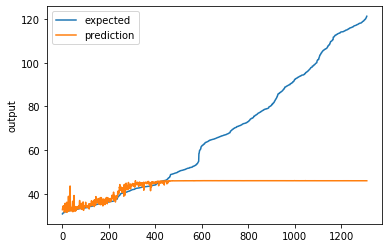

In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    
# Plot the chart
chart_regression(pred_cnn.flatten(),y_test)

# Best in CNN

In [25]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

modelc = Sequential()
modelc.add(Conv2D(300,(4,4), padding='same',activation='relu',strides=(1,1), input_shape = (1,7,5)))
modelc.add(Conv2D(150,(4,4), padding='same',activation='relu',strides=(1,1)))
modelc.add(Conv2D(75,(4,4), padding='same',activation='relu',strides=(1,1)))
modelc.add(Activation('relu'))
modelc.add(Activation('relu'))
modelc.add(MaxPooling2D(pool_size=(1,1)))
modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(150,activation='relu'))
modelc.add(Dropout(0.2))
modelc.add(Dense(250))
modelc.add(Dropout(0.2))
modelc.add(Dense(1))

modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 7, 300)         24300     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 1, 7, 150)         720150    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 7, 75)          180075    
_________________________________________________________________
activation_5 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
activation_6 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 7, 75)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 7, 75)          0         
__________

In [26]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn2.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    modelc.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    modelc.fit(xx_train, y_train,batch_size=128,validation_data=(xx_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 7s - loss: 164.7227 - val_loss: 1843.8491
Epoch 2/1000
 - 6s - loss: 46.5231 - val_loss: 1003.0920
Epoch 3/1000
 - 6s - loss: 25.5217 - val_loss: 325.4858
Epoch 4/1000
 - 6s - loss: 8.8149 - val_loss: 92.5271
Epoch 5/1000
 - 6s - loss: 3.6136 - val_loss: 75.0420
Epoch 6/1000
 - 6s - loss: 3.4825 - val_loss: 6.8298
Epoch 7/1000
 - 6s - loss: 2.9208 - val_loss: 18.3666
Epoch 8/1000
 - 7s - loss: 3.0569 - val_loss: 9.3646
Epoch 9/1000
 - 6s - loss: 3.7310 - val_loss: 21.7493
Epoch 10/1000
 - 5s - loss: 3.2237 - val_loss: 13.6966
Epoch 11/1000
 - 6s - loss: 2.8525 - val_loss: 37.5781
Epoch 00011: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 8s - loss: 7.6535 - val_loss: 20.6001
Epoch 2/1000
 - 8s - loss: 3.0253 - val_loss: 14.1259
Epoch 3/1000
 - 6s - loss: 2.6583 - val_loss: 13.1419
Epoch 4/1000
 - 7s - loss: 2.5058 - val_loss: 6.3671
Epoch 5/1000
 - 9s - loss: 2.6858 - val_loss: 14.5656


In [27]:
modelc.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn2.hdf5")

pred_cnn = modelc.predict(xx_test)

score = np.sqrt(metrics.mean_squared_error(y_test,pred_cnn)) 

print("MSE          :", metrics.mean_squared_error(y_test, pred_cnn))
print("Score (RMSE) : {}".format(score))

MSE          : 4.295577112800337
Score (RMSE) : 2.0725774081564086


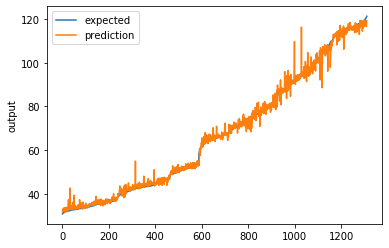

In [28]:
# Plot the chart
chart_regression(pred_cnn.flatten(),y_test)

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

modelc = Sequential()
modelc.add(Conv2D(300,(4,4), padding='same',activation='sigmoid',strides=(1,1), input_shape = (1,7,5)))
modelc.add(Conv2D(150,(4,4), padding='same',activation='sigmoid',strides=(1,1)))
modelc.add(Conv2D(75,(4,4), padding='same',activation='sigmoid',strides=(1,1)))
modelc.add(Activation('sigmoid'))
modelc.add(Activation('sigmoid'))
modelc.add(MaxPooling2D(pool_size=(1,1)))
modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(150,activation='relu'))
modelc.add(Dropout(0.2))
modelc.add(Dense(250))
modelc.add(Dropout(0.2))
modelc.add(Dense(1))

modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 1, 7, 300)         24300     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 1, 7, 150)         720150    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 1, 7, 75)          180075    
_________________________________________________________________
activation_7 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
activation_8 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 7, 75)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1, 7, 75)          0         
__________

In [30]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn3.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    modelc.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    modelc.fit(xx_train, y_train,batch_size=128,validation_data=(xx_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 6s - loss: 150.3407 - val_loss: 3323.8809
Epoch 2/1000
 - 5s - loss: 125.7708 - val_loss: 3773.7809
Epoch 3/1000
 - 4s - loss: 123.9497 - val_loss: 3586.0188
Epoch 4/1000
 - 4s - loss: 124.6915 - val_loss: 3479.0841
Epoch 5/1000
 - 4s - loss: 118.5004 - val_loss: 3460.3519
Epoch 6/1000
 - 4s - loss: 112.6218 - val_loss: 3347.7619
Epoch 00006: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 6s - loss: 114.4599 - val_loss: 3277.8657
Epoch 2/1000
 - 6s - loss: 108.8902 - val_loss: 3528.4409
Epoch 3/1000
 - 4s - loss: 105.0817 - val_loss: 3282.3101
Epoch 4/1000
 - 4s - loss: 92.5951 - val_loss: 2886.1474
Epoch 5/1000
 - 5s - loss: 82.2424 - val_loss: 3154.5905
Epoch 6/1000
 - 5s - loss: 83.2723 - val_loss: 2727.6142
Epoch 7/1000
 - 8s - loss: 72.1396 - val_loss: 2619.9539
Epoch 8/1000
 - 6s - loss: 66.0077 - val_loss: 2646.4607
Epoch 9/1000
 - 5s - loss: 63.2004 - val_loss: 2912.7146
Epoch 10

In [32]:
modelc.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn3.hdf5")

pred_cnn = modelc.predict(xx_test)

score = np.sqrt(metrics.mean_squared_error(y_test,pred_cnn)) 

print("MSE          :", metrics.mean_squared_error(y_test, pred_cnn))
print("Score (RMSE) : {}".format(score))

MSE          : 2075.0265414055216
Score (RMSE) : 45.55245922456351


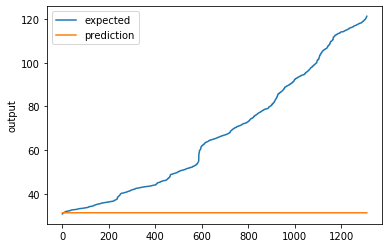

In [33]:
# Plot the chart
chart_regression(pred_cnn.flatten(),y_test)

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

modelc = Sequential()
modelc.add(Conv2D(300,(5,5), padding='same',activation='sigmoid',strides=(1,1), input_shape = (1,7,5)))
modelc.add(Conv2D(150,(5,5), padding='same',activation='sigmoid',strides=(1,1)))
modelc.add(Conv2D(75,(5,5), padding='same',activation='sigmoid',strides=(1,1)))
modelc.add(Activation('sigmoid'))
modelc.add(Activation('sigmoid'))
modelc.add(MaxPooling2D(pool_size=(1,1)))
#modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(150,activation='relu'))
#modelc.add(Dropout(0.2))
modelc.add(Dense(250))
#modelc.add(Dropout(0.2))
modelc.add(Dense(1))

modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 1, 7, 300)         37800     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 1, 7, 150)         1125150   
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 7, 75)          281325    
_________________________________________________________________
activation_9 (Activation)    (None, 1, 7, 75)          0         
_________________________________________________________________
activation_10 (Activation)   (None, 1, 7, 75)          0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 7, 75)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 525)               0         
__________

In [35]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn4.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    modelc.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    modelc.fit(xx_train, y_train,batch_size=128,validation_data=(xx_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 5s - loss: 153.8903 - val_loss: 3527.6881
Epoch 2/1000
 - 4s - loss: 122.3291 - val_loss: 3423.4102
Epoch 3/1000
 - 4s - loss: 122.4219 - val_loss: 3653.2913
Epoch 4/1000
 - 4s - loss: 121.2633 - val_loss: 3397.9789
Epoch 5/1000
 - 4s - loss: 120.7743 - val_loss: 3561.4168
Epoch 6/1000
 - 4s - loss: 115.1302 - val_loss: 3216.9582
Epoch 7/1000
 - 4s - loss: 111.6742 - val_loss: 3464.3338
Epoch 8/1000
 - 4s - loss: 108.5116 - val_loss: 3368.6753
Epoch 9/1000
 - 4s - loss: 100.2962 - val_loss: 3141.4441
Epoch 10/1000
 - 4s - loss: 82.8536 - val_loss: 2744.4853
Epoch 11/1000
 - 4s - loss: 53.2884 - val_loss: 2250.7642
Epoch 12/1000
 - 4s - loss: 30.6055 - val_loss: 1906.6982
Epoch 13/1000
 - 4s - loss: 10.2859 - val_loss: 1818.7334
Epoch 14/1000
 - 4s - loss: 3.3957 - val_loss: 1529.5384
Epoch 15/1000
 - 4s - loss: 1.7723 - val_loss: 1463.2847
Epoch 16/1000
 - 4s - loss: 0.9292 - val_loss: 1421.7423
Epoch 17/1000
 - 4s - los

In [36]:
modelc.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn4.hdf5")

pred_cnn = modelc.predict(xx_test)

score = np.sqrt(metrics.mean_squared_error(y_test,pred_cnn)) 

print("MSE          :", metrics.mean_squared_error(y_test, pred_cnn))
print("Score (RMSE) : {}".format(score))

MSE          : 1275.0133633968323
Score (RMSE) : 35.70732926720833


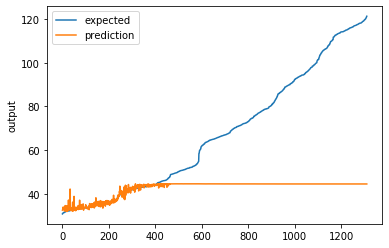

In [37]:
# Plot the chart
chart_regression(pred_cnn.flatten(),y_test)

In [38]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

modelc = Sequential()
modelc.add(Conv2D(300,(5,5), padding='same',activation='tanh',strides=(1,1), input_shape = (1,7,5)))
modelc.add(Conv2D(150,(5,5), padding='same',activation='tanh',strides=(1,1)))
modelc.add(Conv2D(75,(5,5), padding='same',activation='tanh',strides=(1,1)))
modelc.add(Activation('tanh'))
modelc.add(Activation('tanh'))
modelc.add(MaxPooling2D(pool_size=(1,1)))
modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(150,activation='tanh'))
modelc.add(Dropout(0.2))
modelc.add(Dense(250))
modelc.add(Dropout(0.2))
modelc.add(Dense(1))

modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 1, 7, 300)         37800     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 1, 7, 150)         1125150   
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 7, 75)          281325    
_________________________________________________________________
activation_11 (Activation)   (None, 1, 7, 75)          0         
_________________________________________________________________
activation_12 (Activation)   (None, 1, 7, 75)          0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 7, 75)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 1, 7, 75)          0         
__________

In [39]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn5.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    modelc.compile(loss='mean_squared_error', optimizer='adam')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    modelc.fit(xx_train, y_train,batch_size=128,validation_data=(xx_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 6s - loss: 214.2038 - val_loss: 2504.9425
Epoch 2/1000
 - 4s - loss: 31.9917 - val_loss: 1138.4147
Epoch 3/1000
 - 4s - loss: 5.0923 - val_loss: 897.8303
Epoch 4/1000
 - 4s - loss: 2.8993 - val_loss: 705.5180
Epoch 5/1000
 - 4s - loss: 3.5223 - val_loss: 777.5679
Epoch 6/1000
 - 4s - loss: 2.3344 - val_loss: 705.7674
Epoch 7/1000
 - 6s - loss: 2.4151 - val_loss: 650.3235
Epoch 8/1000
 - 6s - loss: 2.3471 - val_loss: 653.4558
Epoch 9/1000
 - 4s - loss: 2.2488 - val_loss: 609.2286
Epoch 10/1000
 - 4s - loss: 2.1771 - val_loss: 580.8044
Epoch 11/1000
 - 4s - loss: 2.6476 - val_loss: 509.5063
Epoch 12/1000
 - 4s - loss: 2.0211 - val_loss: 496.1844
Epoch 13/1000
 - 4s - loss: 2.4507 - val_loss: 537.1492
Epoch 14/1000
 - 4s - loss: 2.3904 - val_loss: 603.5191
Epoch 15/1000
 - 4s - loss: 3.0341 - val_loss: 432.6229
Epoch 16/1000
 - 4s - loss: 2.4711 - val_loss: 469.7824
Epoch 17/1000
 - 4s - loss: 1.9392 - val_loss: 456.5692
Ep

In [41]:
modelc.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn5.hdf5")

pred_cnn = modelc.predict(xx_test)

score = np.sqrt(metrics.mean_squared_error(y_test,pred_cnn)) 

print("MSE          :", metrics.mean_squared_error(y_test, pred_cnn))
print("Score (RMSE) : {}".format(score))

MSE          : 192.20229885054536
Score (RMSE) : 13.863704369703841


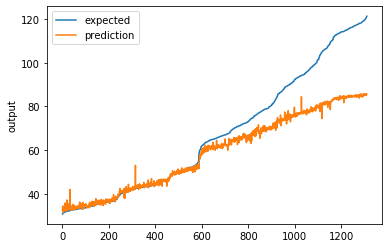

In [42]:
# Plot the chart
chart_regression(pred_cnn.flatten(),y_test)

In [43]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

modelc = Sequential()
modelc.add(Conv2D(300,(5,5), padding='same',activation='tanh',strides=(1,1), input_shape = (1,7,5)))
modelc.add(Conv2D(150,(5,5), padding='same',activation='tanh',strides=(1,1)))
modelc.add(Conv2D(75,(5,5), padding='same',activation='tanh',strides=(1,1)))
modelc.add(Activation('tanh'))
modelc.add(Activation('tanh'))
modelc.add(MaxPooling2D(pool_size=(1,1)))
modelc.add(Dropout(0.2))
modelc.add(Flatten())
modelc.add(Dense(150,activation='tanh'))
modelc.add(Dropout(0.2))
modelc.add(Dense(250))
modelc.add(Dropout(0.2))
modelc.add(Dense(1))

modelc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 1, 7, 300)         37800     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 1, 7, 150)         1125150   
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 1, 7, 75)          281325    
_________________________________________________________________
activation_13 (Activation)   (None, 1, 7, 75)          0         
_________________________________________________________________
activation_14 (Activation)   (None, 1, 7, 75)          0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 7, 75)          0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 1, 7, 75)          0         
__________

In [44]:
checkpointer = ModelCheckpoint(filepath=r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn6.hdf5", verbose=0, save_best_only=True) # save best model

for i in range(5):
    print(i)   
    modelc.compile(loss='mean_squared_error', optimizer='rmsprop')
    monitor = EarlyStopping(monitor='val_loss', min_delta=1e-4, patience=5, verbose=1, mode='auto')
    modelc.fit(xx_train, y_train,batch_size=128,validation_data=(xx_test,y_test),callbacks=[monitor,checkpointer],verbose=2,epochs=1000)

0
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 7s - loss: 194.7688 - val_loss: 6287.7357
Epoch 2/1000
 - 4s - loss: 51.8559 - val_loss: 2439.0253
Epoch 3/1000
 - 4s - loss: 26.2425 - val_loss: 1611.9725
Epoch 4/1000
 - 4s - loss: 19.3867 - val_loss: 1603.2297
Epoch 5/1000
 - 4s - loss: 21.2408 - val_loss: 3949.6429
Epoch 6/1000
 - 4s - loss: 29.4913 - val_loss: 1726.8214
Epoch 7/1000
 - 4s - loss: 17.8603 - val_loss: 1563.9979
Epoch 8/1000
 - 4s - loss: 18.7692 - val_loss: 1591.3885
Epoch 9/1000
 - 4s - loss: 17.4719 - val_loss: 6292.7181
Epoch 10/1000
 - 4s - loss: 22.6863 - val_loss: 4907.3069
Epoch 11/1000
 - 4s - loss: 14.8904 - val_loss: 4683.3791
Epoch 12/1000
 - 4s - loss: 14.1984 - val_loss: 4884.5543
Epoch 00012: early stopping
1
Train on 3066 samples, validate on 1310 samples
Epoch 1/1000
 - 6s - loss: 36.9610 - val_loss: 4628.2623
Epoch 2/1000
 - 4s - loss: 19.2231 - val_loss: 5036.5425
Epoch 3/1000
 - 4s - loss: 12.9737 - val_loss: 4540.0119
Epoch 4/1000


In [70]:
modelc.load_weights(r"C:\Users\veena\Documents\Veena\Veena Edu\Fall 2019\Artificial Intelligence\Project2\cnn6.hdf5")

pred_cnn = modelc.predict(xx_test)

score = np.sqrt(metrics.mean_squared_error(y_test,pred_cnn)) 

print("MSE          :", metrics.mean_squared_error(y_test, pred_cnn))
print("Score (RMSE) : {}".format(score))

Score (RMSE) : 37.86118741853477
MSE          : 1433.4695127414157


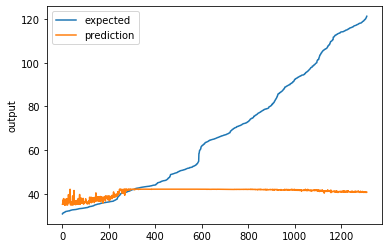

In [71]:
# Plot the chart
chart_regression(pred_cnn.flatten(),y_test)